# <span style="color:#008000"/>ReCell Used Phones Case Study

### Background
Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market. Analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

### Data Dictionary

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

### <span style="color:#008000"/>Import Libraries and Data

In [1]:
# import warnings library to hide warning and deprecation messages
import warnings
warnings.filterwarnings("ignore")

# import data handling and numeric processing libraries
import pandas as pd
import numpy as np

# import visualizations and chart libraries
import seaborn as sns
import matplotlib.pyplot as plt

# command to display plots in the notebook
%matplotlib inline

# set styling options
sns.set_style('darkgrid')

# import libraries for variable scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, PolynomialFeatures

# import library to train and test
from sklearn.model_selection import train_test_split

# linear regression_model library
from sklearn.linear_model import LinearRegression

# libray for model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# import statsmodels
import statsmodels.api as stat_model

# imort vif function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import packages for Q-Q plot
import pylab
import scipy.stats as stats

# import packages to test heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [2]:
# import data
data = data_o = pd.read_csv('used_phone_data.csv')

# check if data loaded
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       86.96  
1        325     249.39      161.49  
2        162     359.47      268.55  
3        345     278.93      180.23  
4        293     140.87      103.80

### <span style="color:#008000"/>Data Overview

In [3]:
# number of observations and columns
data.shape

(3571, 15)

In [4]:
# column names
data.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [5]:
# basic info about the data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


- There are 3,571 observations and 15 columns
- The column types includes 2 integer, 9 float and 4 object/string
- main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight columns have few missing values

In [6]:
# convert object variables into categorical variables
for col in ['os', '4g', '5g']:
    data[col] = data[col].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   object  
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(3), float64(9), int64(2), object(1)
memory usage: 345.7+ KB


- converting object columns into categry helped reduce the data size by 100KB

In [8]:
# Let's confirm exact number of missing values
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [9]:
# Let's describe the numerical data
data.describe().T

count         mean          std       min       25%  \
screen_size       3571.0    14.803892     5.153092     2.700    12.700   
main_camera_mp    3391.0     9.400454     4.818396     0.080     5.000   
selfie_camera_mp  3569.0     6.547352     6.879359     0.300     2.000   
int_memory        3561.0    54.532607    84.696246     0.005    16.000   
ram               3561.0     4.056962     1.391844     0.030     4.000   
battery           3565.0  3067.225666  1364.206665    80.000  2100.000   
weight            3564.0   179.424285    90.280856    23.000   140.000   
release_year      3571.0  2015.964996     2.291784  2013.000  2014.000   
days_used         3571.0   675.391487   248.640972    91.000   536.000   
new_price         3571.0   237.389037   197.545581     9.130   120.130   
used_price        3571.0   109.880277   121.501226     2.510    45.205   

                      50%       75%       max  
screen_size         13.49    16.510     46.36  
main_camera_mp       8.00    13.000     48.00  
selfie_camera_mp     5.00     8.000     32.00  
int_memory          32.00    64.000   1024.00  
ram                  4.00     4.000     16.00  
battery           3000.00  4000.000  12000.00  
weight             159.00   184.000    950.00  
release_year      2016.00  2018.000   2020.00  
days_used          690.00   872.000   1094.00  
new_price          189.80   291.935   2560.20  
used_price          75.53   126.000   1916.54

- All the columns except days_used are right skewed
- day_used is left skewed
- release_year shouldn't be included in numerical analysis as it is a temporal variable

In [10]:
# Let's describe the numerical data
data.describe(exclude='number').T

count unique      top  freq
brand_name  3571     34   Others   509
os          3571      4  Android  3246
4g          3571      2      yes  2359
5g          3571      2       no  3419

- There are 53 unique brand names with an additional Others type
- 4 os values
- 4g and 5g are yes or no responses

### Univariate Analysis

In [11]:
def Hist_Bar_Plt(variable,title):
    """This function plots histogram and bar plot 
       for the input variable. The histogram plots 
       shows mean and median lines."""

    fig, ax = plt.subplots(nrows=2,figsize=(15,12))

    fig.suptitle(f'Histogram and Boxplot {title}')
    
    mean = variable.mean()
    median = variable.median()
    sns.histplot(x=variable, ax=ax[0], kde=True)
    ax[0].axvline(mean, color='r', linestyle='-', label="Mean")
    ax[0].axvline(median, color='b', linestyle='-', label="Median")
    ax[0].legend()
    
    sns.boxplot(ax=ax[1],x=variable,showmeans=True,palette="Set2")
    fig.show()

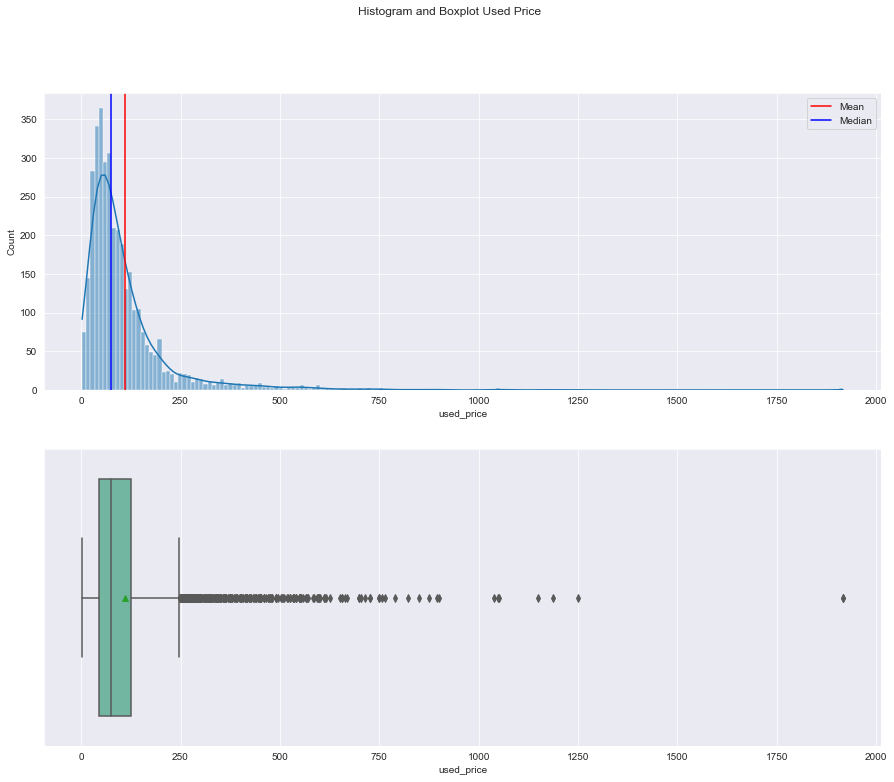

In [12]:
Hist_Bar_Plt(data['used_price'],'Used Price')

- The used_price is highly right skewed
- Very long tail on the right
- Used price goes up to 2,000, a lot of observations lie between 250-1,250

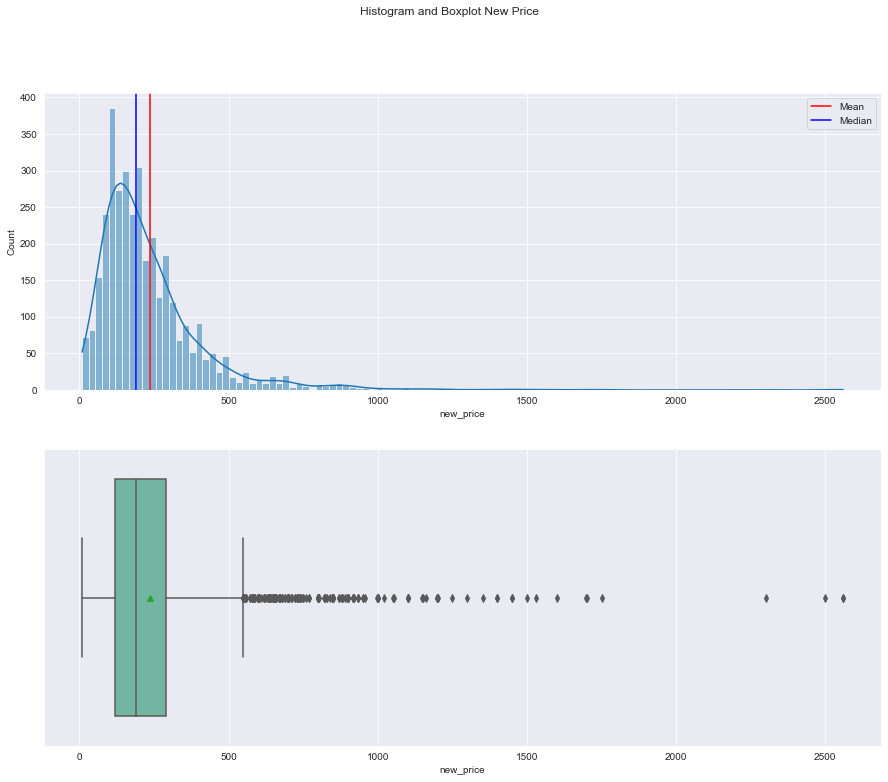

In [13]:
Hist_Bar_Plt(data['new_price'],'New Price')

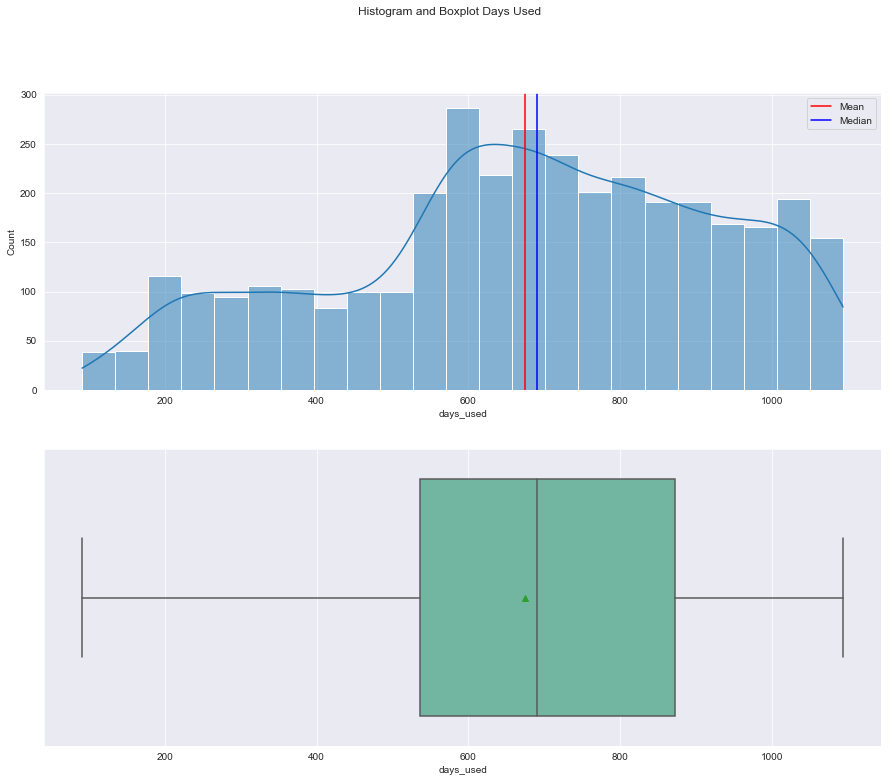

In [14]:
Hist_Bar_Plt(data['days_used'],'Days Used')

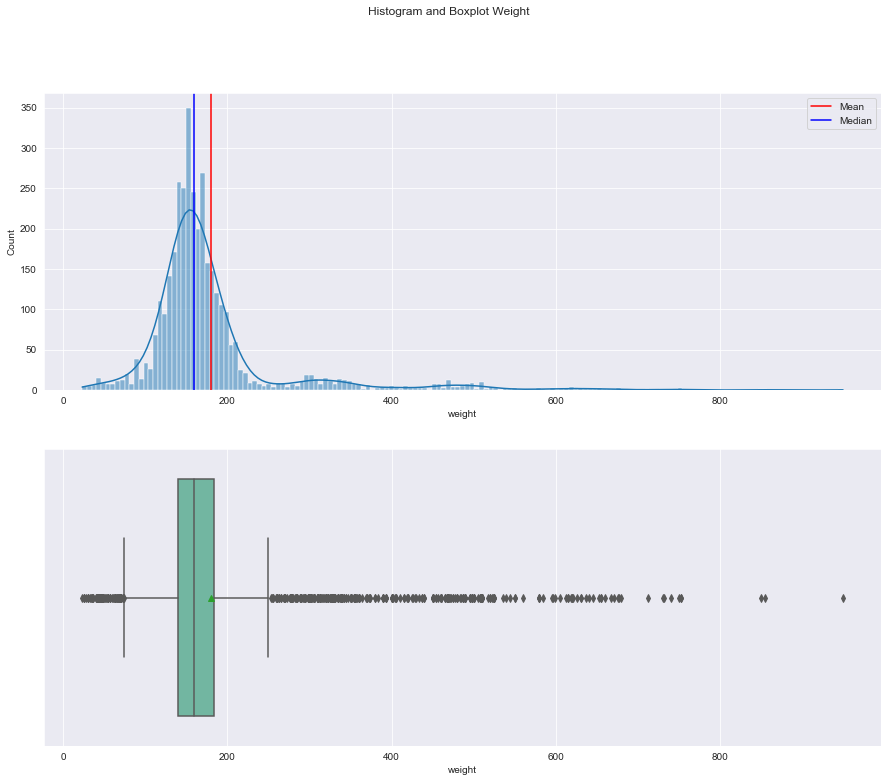

In [15]:
Hist_Bar_Plt(data['weight'],'Weight')

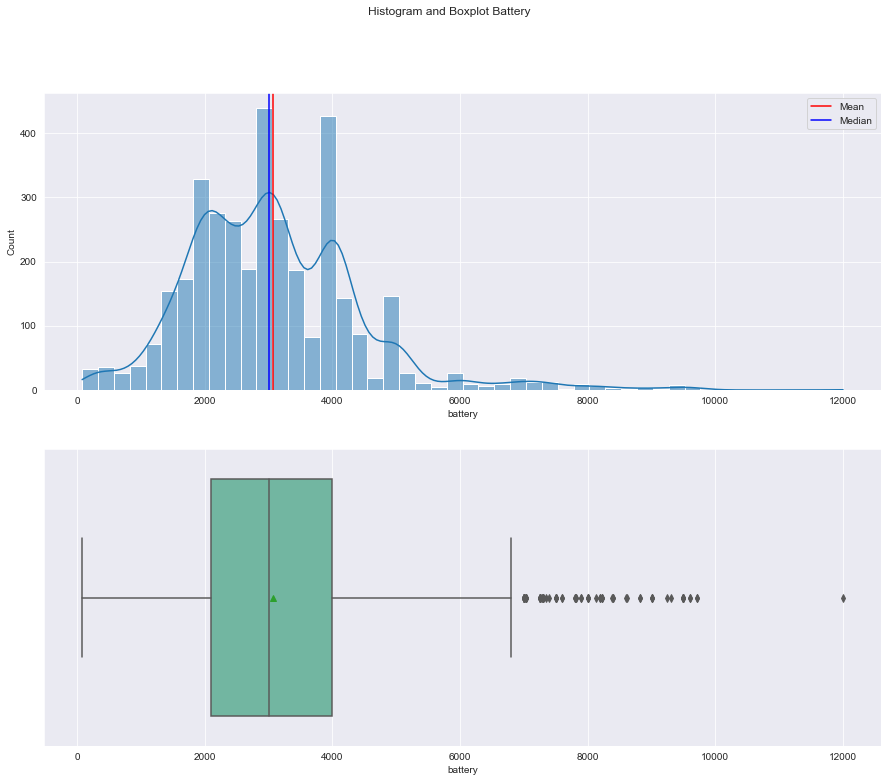

In [16]:
Hist_Bar_Plt(data['battery'],'Battery')

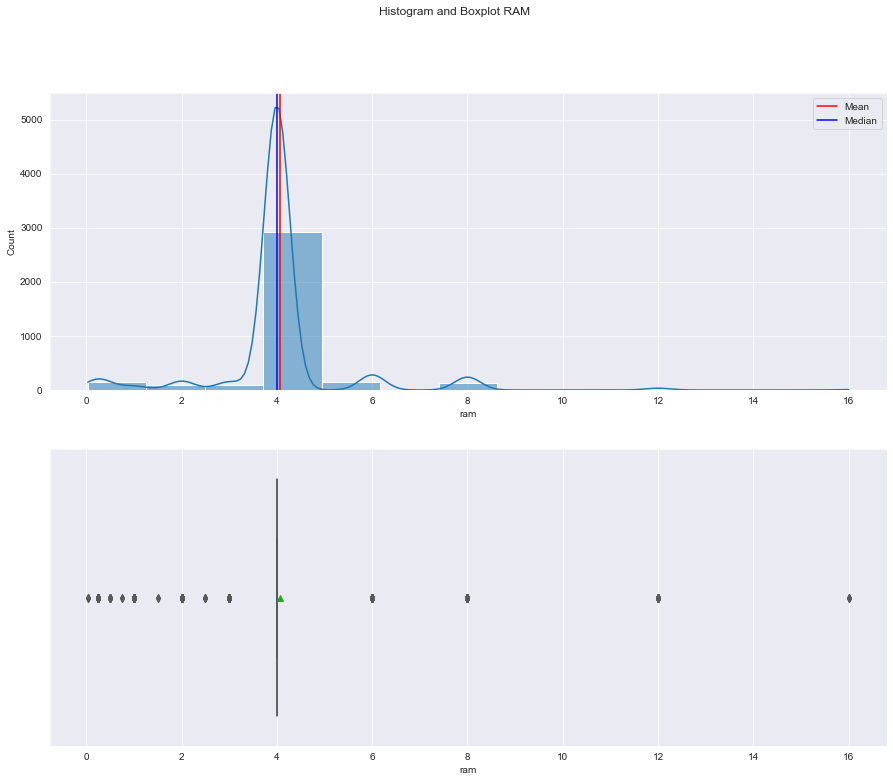

In [17]:
Hist_Bar_Plt(data['ram'],'RAM')

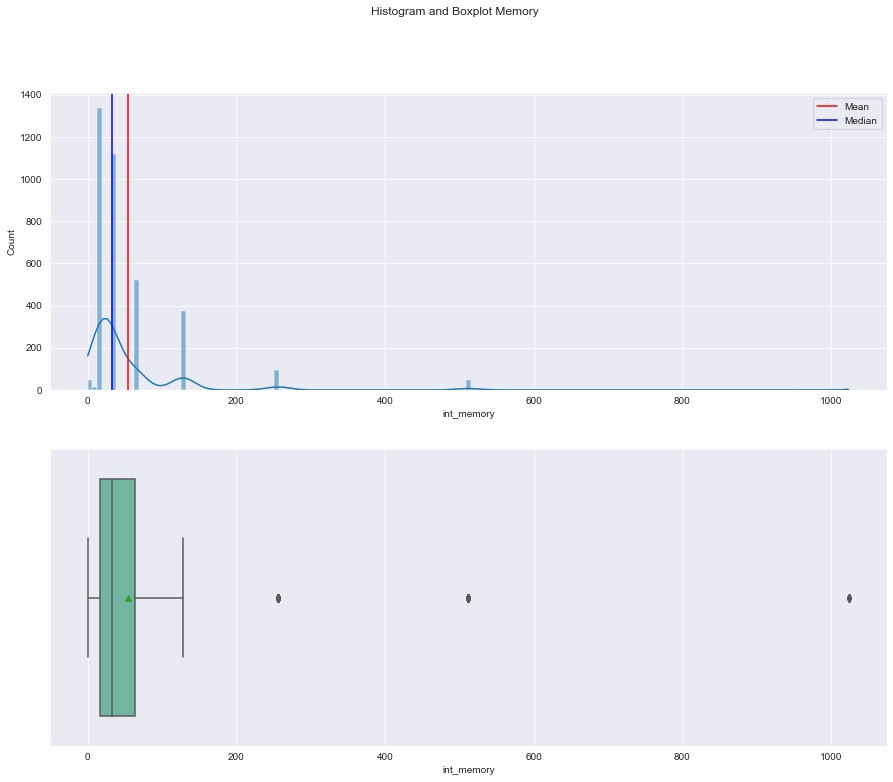

In [18]:
Hist_Bar_Plt(data['int_memory'],'Memory')

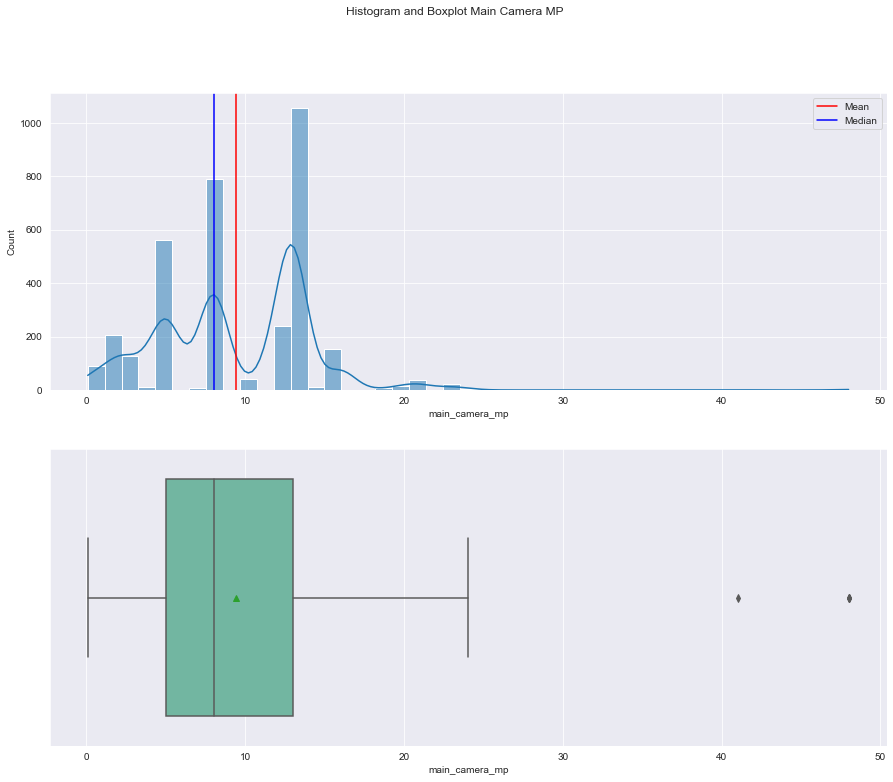

In [19]:
Hist_Bar_Plt(data['main_camera_mp'],'Main Camera MP')

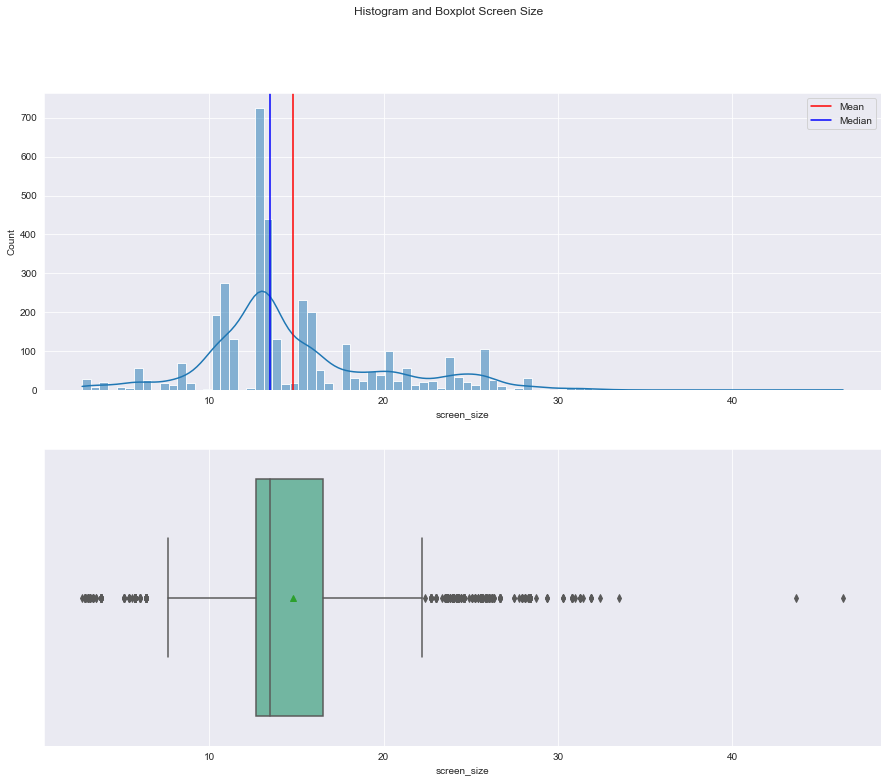

In [20]:
Hist_Bar_Plt(data['screen_size'],'Screen Size')

Univariate analysis on categorical variables

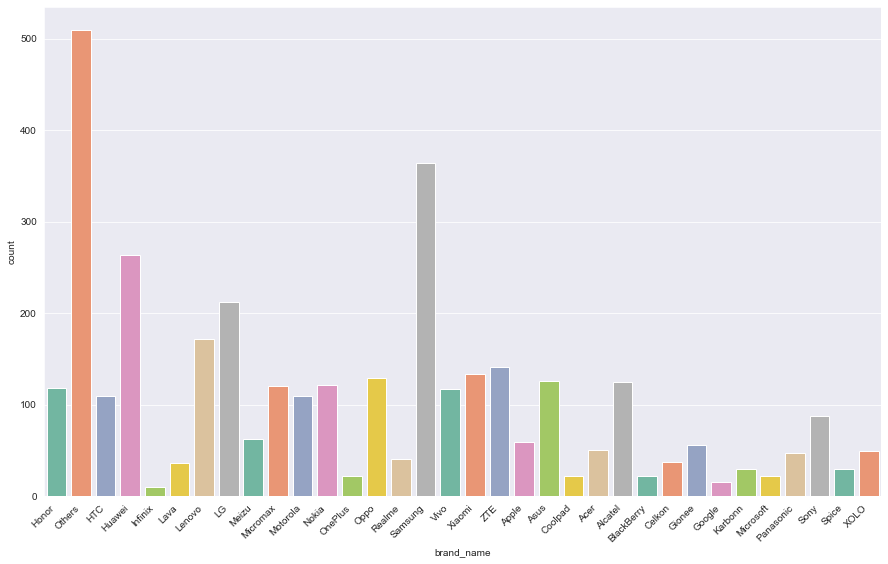

In [21]:
# Plotting brand_name
plt.figure(figsize=(15,9))
category = data['brand_name']
ch = sns.countplot(category,palette="Set2")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

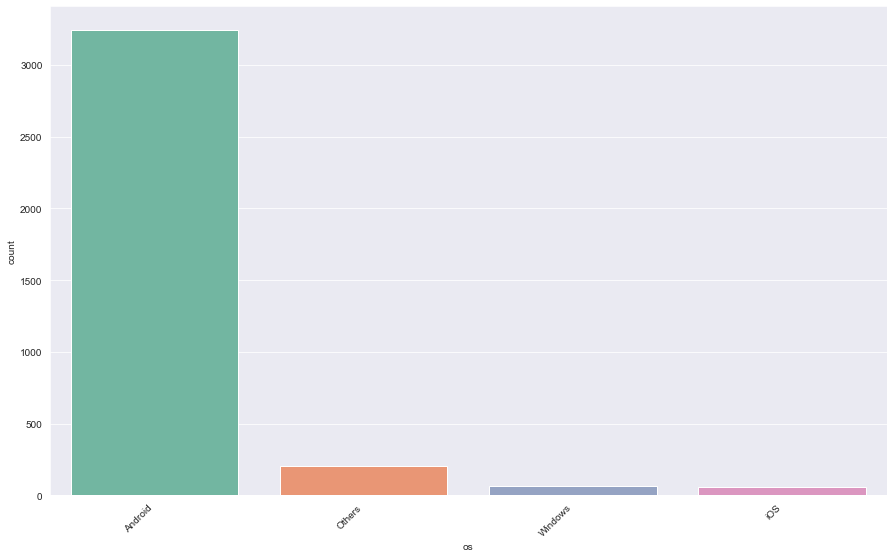

In [22]:
# Plotting os
plt.figure(figsize=(15,9))
category = data['os']
ch = sns.countplot(category,palette="Set2")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

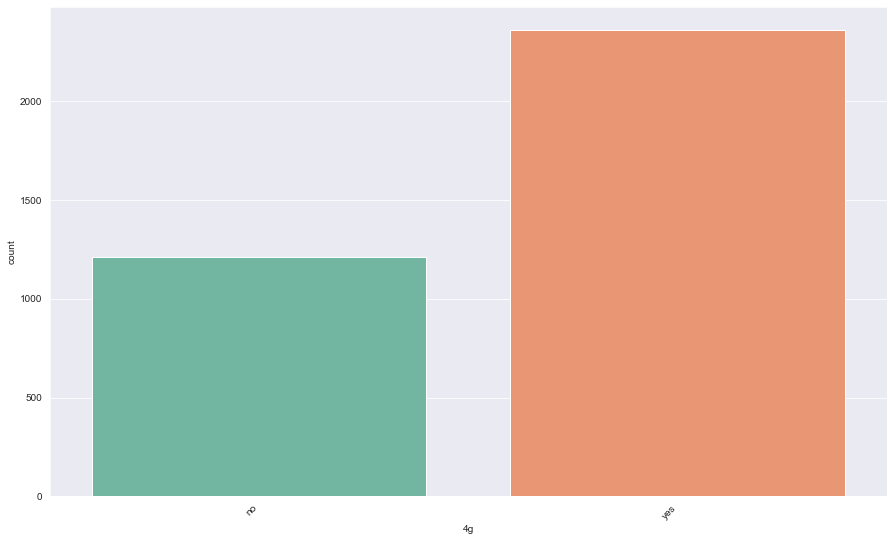

In [23]:
# Plotting 4g
plt.figure(figsize=(15,9))
category = data['4g']
ch = sns.countplot(category,palette="Set2")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

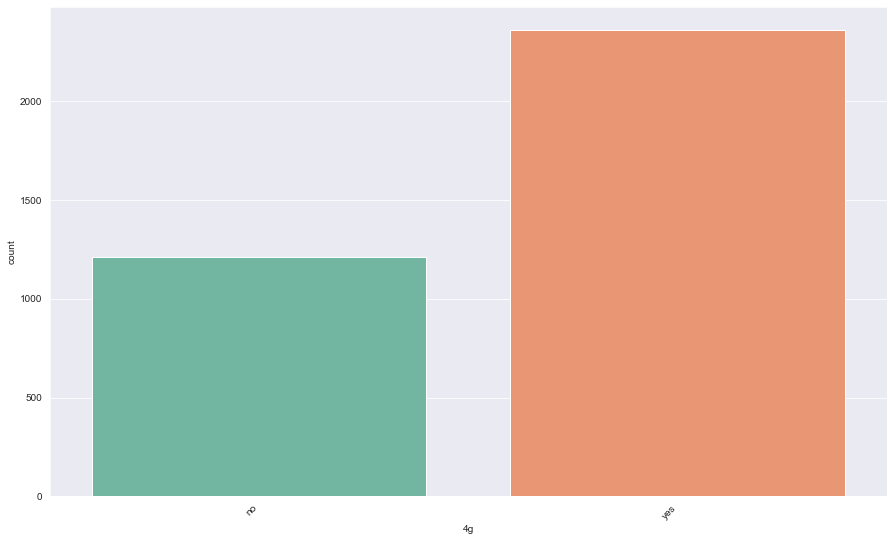

In [24]:
# Plotting 5g
plt.figure(figsize=(15,9))
category = data['4g']
ch = sns.countplot(category,palette="Set2")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Let's look at the specific questions

1. What does the distribution of used phone prices look like?

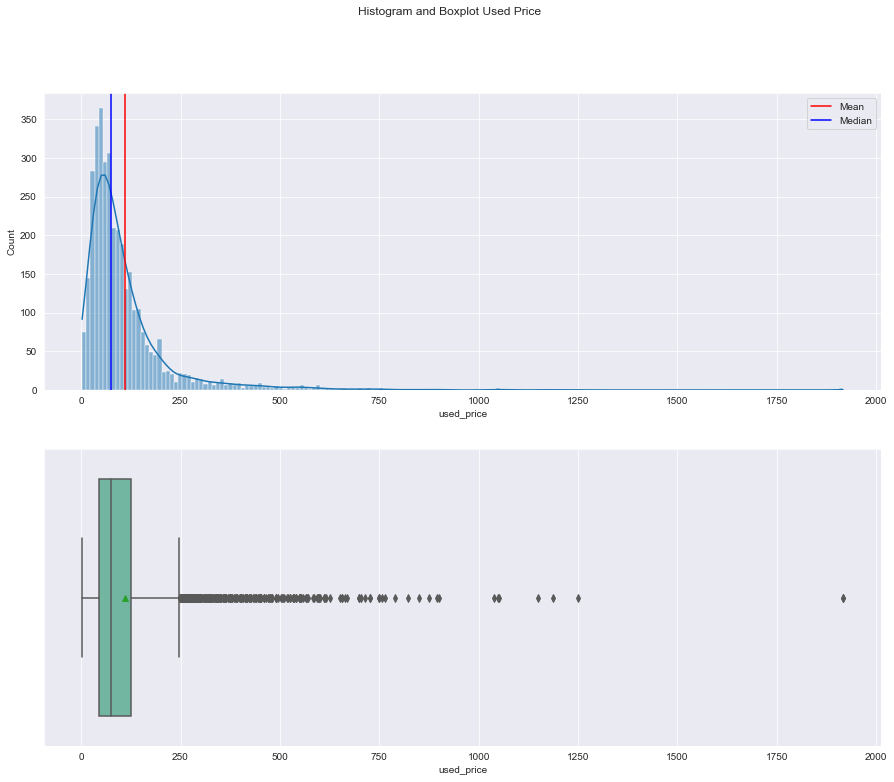

In [25]:
Hist_Bar_Plt(data['used_price'],'Used Price')

- As we can see, the used price is right skewed data
- Lot of observations fall above 250, ranging upto 1900

2. What percentage of the used phone market is dominated by Android devices?

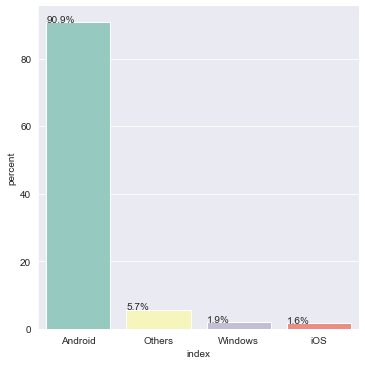

In [26]:
# Create a DataFrame
new_data = pd.DataFrame(data['os'].value_counts().reset_index())

# Calculate Percentage
new_data['percent'] = round((new_data['os'] / new_data['os'].sum()) * 100,2)
pl = sns.catplot(x='index', y='percent', kind='bar',data=new_data,palette="Set3")

for p in pl.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    pl.ax.text(txt_x,txt_y,txt)

- 90% of the used phones have Android OS

3. How does the amount of RAM vary with the brand?

In [27]:
# get Brand and RAM data
new_data = (data.groupby(['brand_name', 'ram']).size().unstack(fill_value=0)).reset_index()
new_data

ram  brand_name  0.03  0.25  0.5  0.75  1.0  1.5  2.0  2.5  3.0  4.0  6.0  \
0          Acer     0     0    0     0    1    0    1    0    0   49    0   
1       Alcatel     0     7    3     0   10    0    2    0    1  102    0   
2         Apple     0     0    0     0    0    0    1    0    2   54    2   
3          Asus     0     0    0     0    0    0    2    0    0  121    1   
4    BlackBerry     0     1    0     0    0    0    0    0    0   21    0   
5        Celkon     0    25    0     0    0    0    0    0    0   12    0   
6       Coolpad     0     0    0     0    0    0    0    0    1   21    0   
7        Gionee     0     1    0     0    0    0    0    0    0   55    0   
8        Google     0     0    0     0    0    0    0    0    0   11    4   
9           HTC     0     0    0     0    0    0    0    0    4  104    2   
10        Honor     0     0    0     0    0    0    6    0   10   72   14   
11       Huawei     2     5    0     0    2    0    4    0    2  185   34   
12      Infinix     0     0    0     0    0    0    6    0    2    2    0   
13      Karbonn     0     5    0     0    0    0    0    0    0   25    0   
14           LG     0     2    2     0    6    0    6    0   14  170    6   
15         Lava     0     4    2     0    0    0    2    0    0   28    0   
16       Lenovo     0     2    0     0    2    0    8    0    2  152    6   
17        Meizu     0     0    0     0    0    0    2    0    0   48    8   
18     Micromax     0     8    0     0    0    0    0    0    0  112    0   
19    Microsoft     0     0    0     0    0    0    0    0    0   22    0   
20     Motorola     0     0    0     0    0    0   12    0    2   92    2   
21        Nokia     0    11    2     0    2    0    8    4    4   74    2   
22      OnePlus     0     0    0     0    0    0    0    0    0   10    2   
23         Oppo     0     0    0     0    2    0    2    0    6   85    6   
24       Others     1    27    1     0    8    0    9    0    4  448    8   
25    Panasonic     0     0    0     0    0    0    0    0    0   47    0   
26       Realme     0     0    0     0    0    0    4    0    8   17   12   
27      Samsung     0     2    0     2    1    2    6    0    8  320   10   
28         Sony     0     0    0     0    0    0    0    0    0   86    1   
29        Spice     0     2    0     0    0    0    0    0    0   28    0   
30         Vivo     0     0    1     0    0    0    2    0    2   83    9   
31         XOLO     0     0    0     0    0    0    0    0    0   49    0   
32       Xiaomi     0     0    0     0    1    0    4    0    7   89   21   
33          ZTE     0     1    0     0    2    0    3    0    3  124    5   

ram  8.0  12.0  16.0  
0      0     0     0  
1      0     0     0  
2      0     0     0  
3      2     0     0  
4      0     0     0  
5      0     0     0  
6      0     0     0  
7      0     0     0  
8      0     0     0  
9      0     0     0  
10    16     0     0  
11    26     2     2  
12     0     0     0  
13     0     0     0  
14     6     0     0  
15     0     0     0  
16     0     0     0  
17     4     0     0  
18     0     0     0  
19     0     0     0  
20     0     2     0  
21     2     0     2  
22     8     2     0  
23    24     4     0  
24     3     0     0  
25     0     0     0  
26     0     0     0  
27     6     7     0  
28     1     0     0  
29     0     0     0  
30    20     0     0  
31     0     0     0  
32    11     1     0  
33     3     0     0

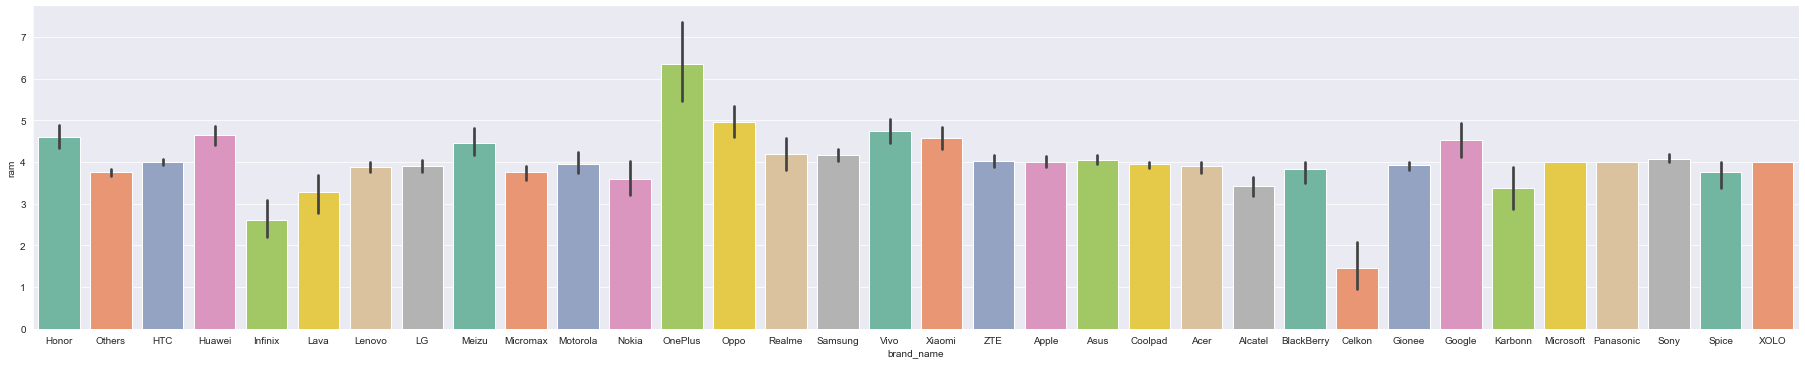

In [28]:
# plt.figure(figsize=(20,9))
# sns.catplot(x='brand_name', y='ram', kind='bar',data=data,palette="Set2")
# plt.show()

plot = sns.catplot (data=data,
             x="brand_name",
             y="ram",
             kind='bar',
           #  ci=50,
#  hue="ram",
             palette="Set2", legend=False,  height=5, aspect=5)

plt.show()

- Most of the brands have 4 RAMs
- Oneplus provides higher RAM phones
4. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [29]:
new_data = data[data['battery']>4500].reset_index()

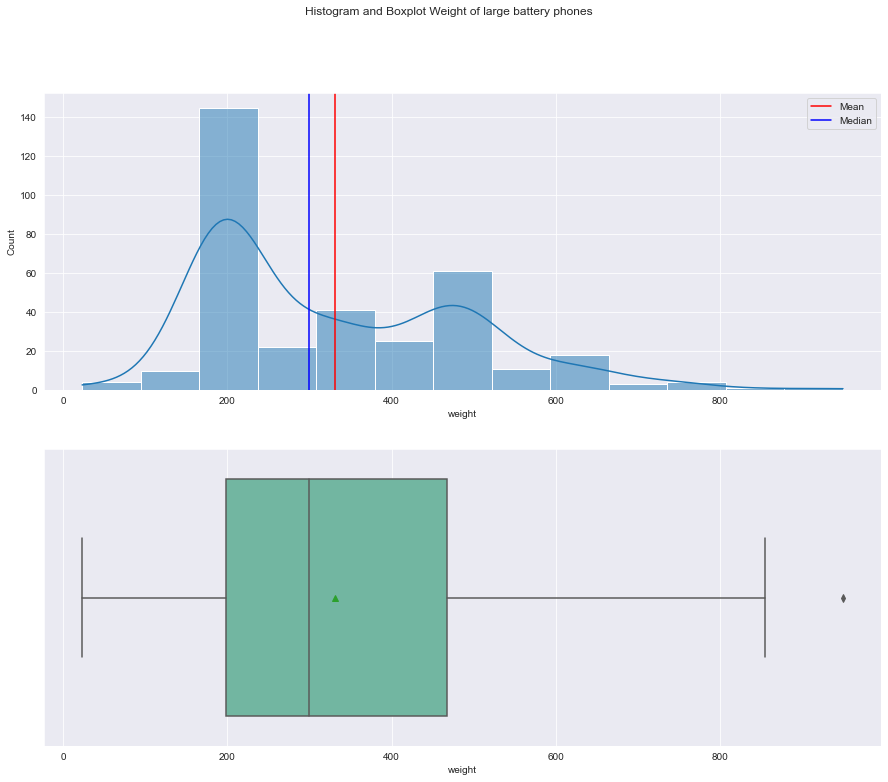

In [30]:
Hist_Bar_Plt(new_data['weight'],'Weight of large battery phones')

- Most of the phones weigh 200 and above

5. How many phones are available across different brands with a screen size larger than 6 inches?

In [31]:
new_data = data[data['screen_size']>15.24].reset_index()

In [32]:
new_data['brand_name'].value_counts()

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Motorola       44
Asus           44
Realme         40
Alcatel        28
Nokia          28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
XOLO            4
Google          4
Coolpad         3
Lava            2
Spice           2
BlackBerry      2
Panasonic       2
Celkon          2
Karbonn         2
Microsoft       1
Name: brand_name, dtype: int64

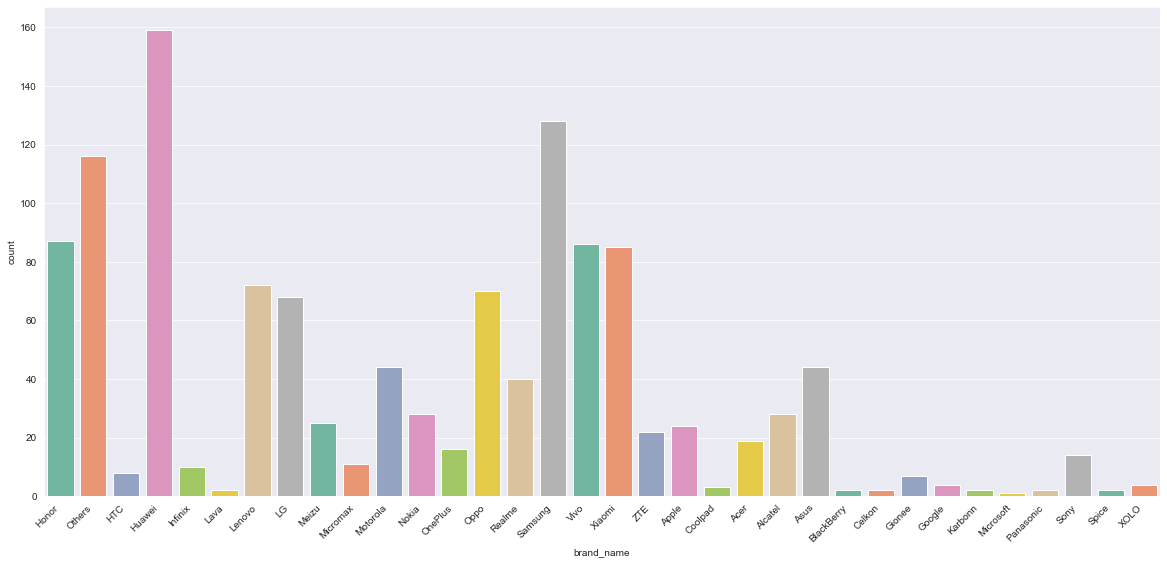

In [33]:
plt.figure(figsize=(20,9))
ch = sns.countplot(data=new_data, x="brand_name", palette="Set2")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

- Huawei has most large screen phones
- The second top is Samsung
- Honor, Vivo, Xiaomi, and Others have large screen phones

6. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [34]:
new_data = data[data['selfie_camera_mp']>8.0].reset_index()

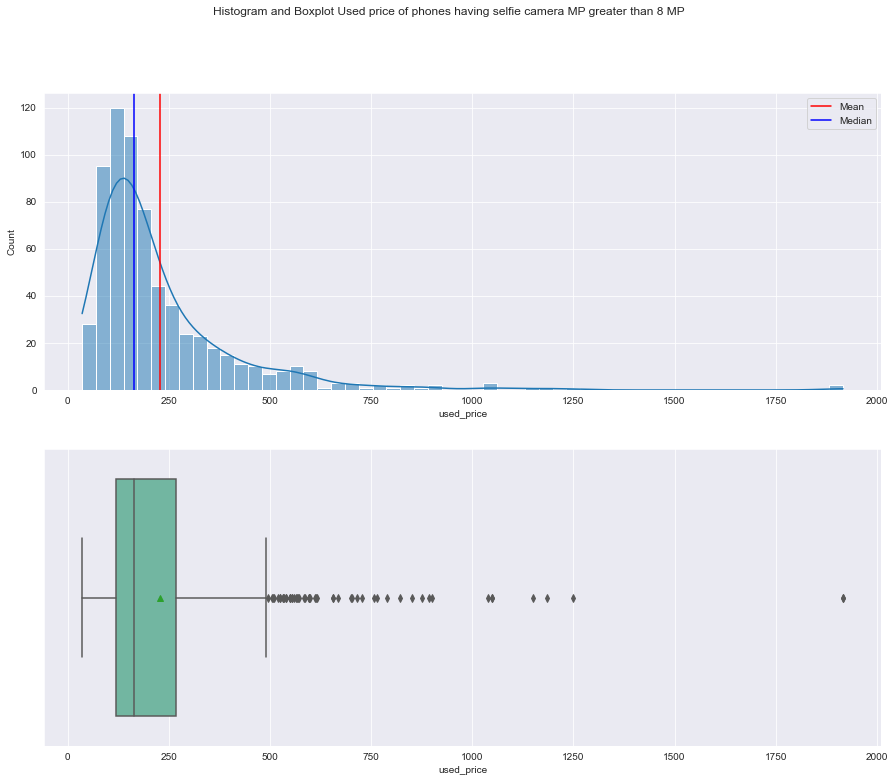

In [35]:
Hist_Bar_Plt(new_data['used_price'],'Used price of phones having selfie camera MP greater than 8 MP')

- Most of the phones priced lower than 500
- There are few phones that between 1000-2000 price

7. Which attributes are highly correlated with the used phone price?

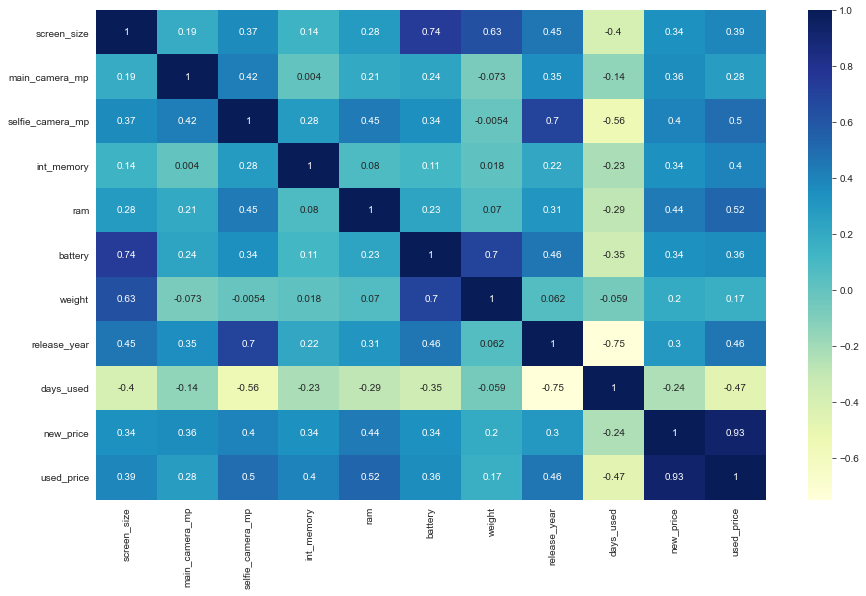

In [36]:
# Let's plot correlations heatmap to find attributes correlated to used price
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Used price is highly positively correlated with the new price
- Used price is negatively correlated with the number of days used
- Screen size and battery have positive relation
- Recent release year have higher selfie camera MP
- Larger screen size phones are heavier weight

## <span style="color:#008000"/>Data Preprocessing

### Missing Value Treatment

In [37]:
# Let's find number of missing values
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [38]:
# Let's find number of missing values per row
data.isnull().sum(axis=1).value_counts()

0    3368
1     193
2       8
3       2
dtype: int64

- main_camera_mp has most missing values
- selfie_camera_mp, int_memory, ram, battery, and weight have 10 or less missing values
- row level 3,368 rows have no missing values
- 193 observations have one missing value, 8 have 2 missing and 2 have 3 missing

In [39]:
# Let's check if missingness has a structure i.e. similar types of data types columns are missing
num_missing = data.isnull().sum(axis=1)
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, missing values are for:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')

For the rows with exactly 1 missing values, missing values are for:
main_camera_mp      180
selfie_camera_mp      2
battery               4
weight                7
dtype: int64


For the rows with exactly 2 missing values, missing values are for:
int_memory    8
ram           8
dtype: int64


For the rows with exactly 3 missing values, missing values are for:
int_memory    2
ram           2
battery       2
dtype: int64




- For 1 missing values there is no pattern
- For 2 missing values int_memory and ram both are missing
- For 3 missing values int_memory, ram and battery are missing

We've to handle missing values for following fields:
- main_camera_mp
- selfie_camera_mp
- battery
- weight
- int_memory
- ram

All the columns with missing value are of numerical type

In [40]:
data[['main_camera_mp','selfie_camera_mp','battery','weight','int_memory','ram']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   main_camera_mp    3391 non-null   float64
 1   selfie_camera_mp  3569 non-null   float64
 2   battery           3565 non-null   float64
 3   weight            3564 non-null   float64
 4   int_memory        3561 non-null   float64
 5   ram               3561 non-null   float64
dtypes: float64(6)
memory usage: 167.5 KB


#### Let's fix the missing values

In [41]:
# Since the number of missing values for main_camera_mp are higher, let's drop the missing observations
data.dropna(subset=['main_camera_mp'],inplace=True)

In [42]:
data.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp       0
selfie_camera_mp     2
int_memory          10
ram                 10
battery              6
weight               7
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

In [43]:
# The rest of the missing value fields have almost normal distribution, we'll replace the missing value by median
data.fillna(data.median(),inplace=True)

In [44]:
data.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

The missing value are fixed. There are no more missing values in the dataset

Checking if need feature enginnering

In [45]:
data.describe().T

count         mean          std       min       25%  \
screen_size       3391.0    14.547685     5.059141     2.700    11.350   
main_camera_mp    3391.0     9.400454     4.818396     0.080     5.000   
selfie_camera_mp  3391.0     6.073282     6.499278     0.300     2.000   
int_memory        3391.0    51.915840    84.842400     0.005    16.000   
ram               3391.0     3.981079     1.266994     0.030     4.000   
battery           3391.0  3002.594957  1360.619919    80.000  2040.000   
weight            3391.0   178.824521    92.436297    23.000   140.000   
release_year      3391.0  2015.771749     2.183562  2013.000  2014.000   
days_used         3391.0   696.041286   236.123312    91.000   563.000   
new_price         3391.0   231.997185   193.530938     9.130   119.810   
used_price        3391.0   103.504636   114.732601     2.510    44.755   

                      50%       75%       max  
screen_size         13.49    16.030     46.36  
main_camera_mp       8.00    13.000     48.00  
selfie_camera_mp     5.00     8.000     32.00  
int_memory          32.00    64.000   1024.00  
ram                  4.00     4.000     16.00  
battery           3000.00  3840.000  12000.00  
weight             156.20   180.000    950.00  
release_year      2015.00  2018.000   2020.00  
days_used          705.00   881.000   1094.00  
new_price          189.07   281.265   2560.20  
used_price          74.65   120.210   1916.54

In [46]:
# Checking categorical variables
num_to_display = 5
for col in data.dtypes[data.dtypes == 'category'].index:
    val_counts = data[col].value_counts()
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n') 

Android    3067
Others      201
Windows      67
iOS          56
Name: os, dtype: int64


yes    2180
no     1211
Name: 4g, dtype: int64


no     3306
yes      85
Name: 5g, dtype: int64




All the fields are either numerical or categorical.

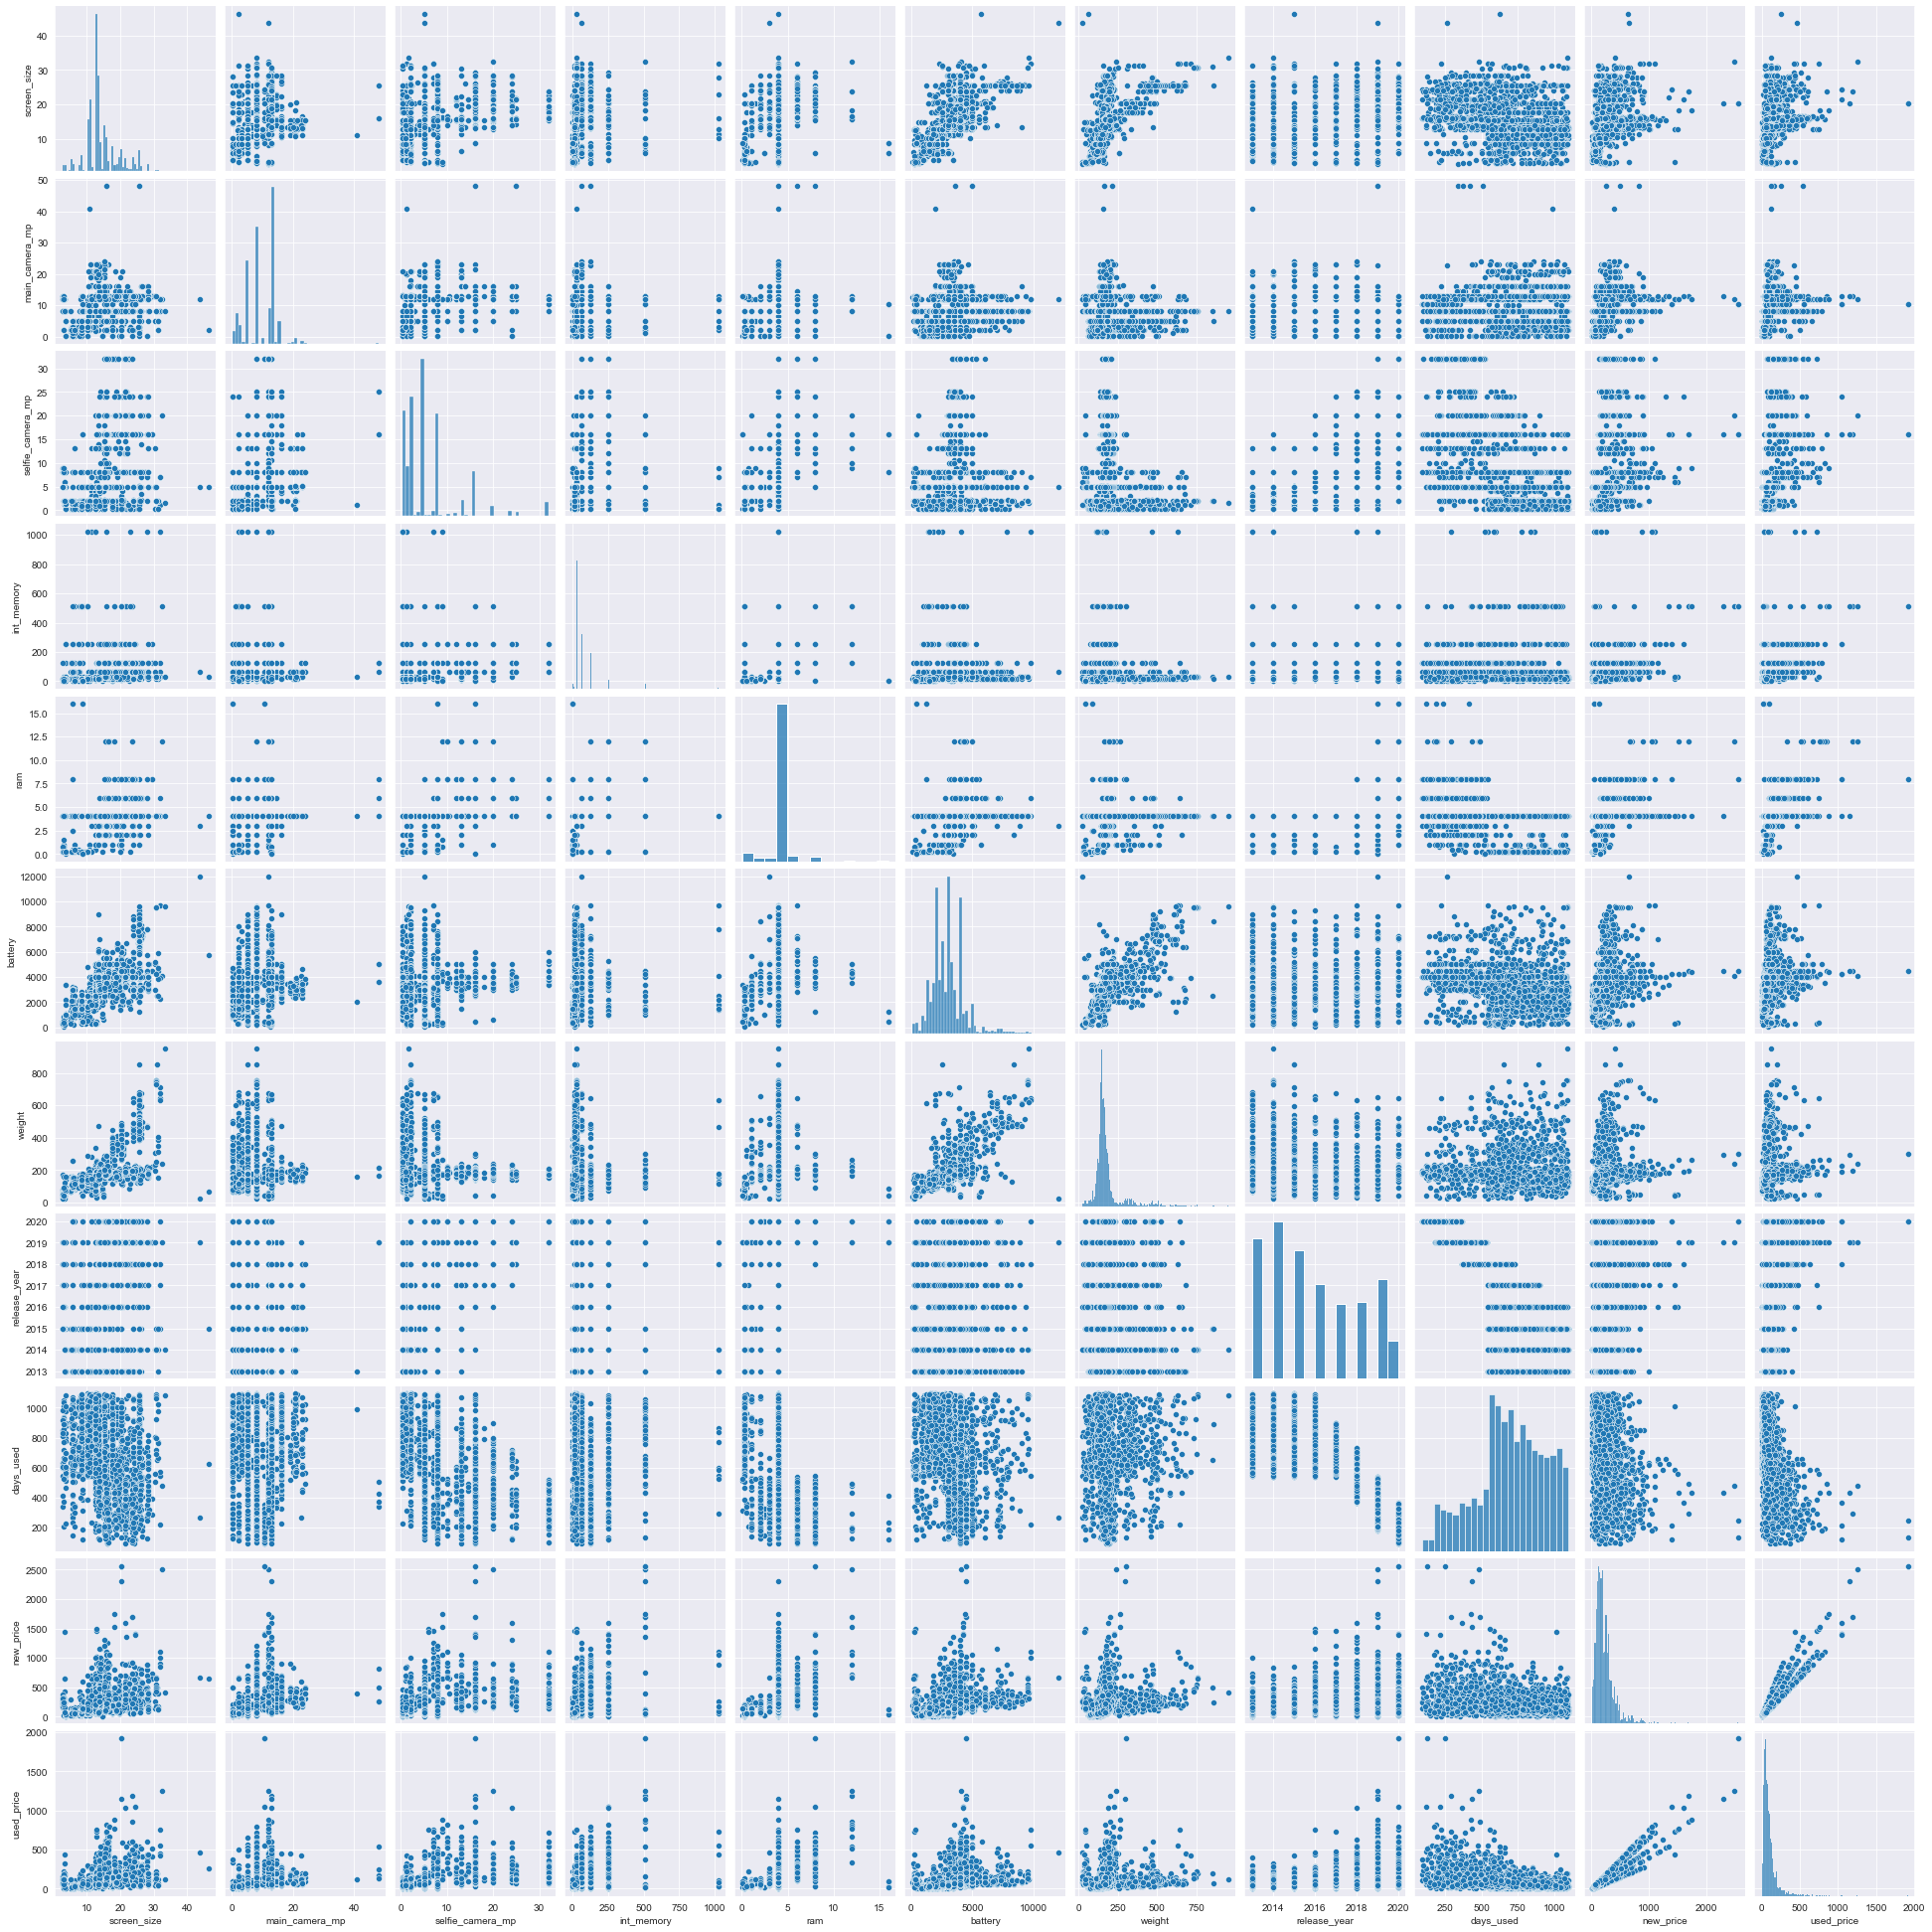

In [47]:
sns.pairplot(data=data)
plt.show()

### Data preprocessing

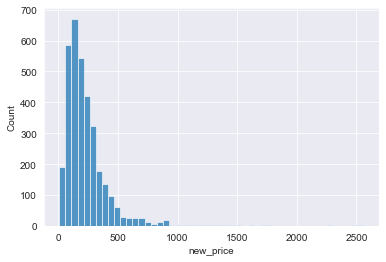

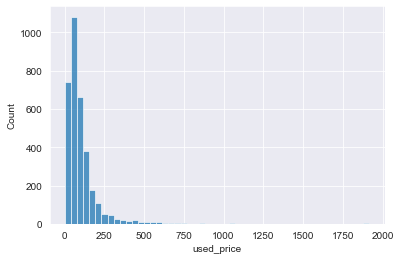

0 New Price: 0
0 Used Price: 0


In [48]:
# New price and Used price are skewed, let's take a closer look

sns.histplot(data=data['new_price'],bins=50)
plt.show()

sns.histplot(data=data['used_price'],bins=50)
plt.show()

# Check non-positive values
print(f'0 New Price: {np.sum(data["new_price"] <= 0)}')
print(f'0 Used Price: {np.sum(data["used_price"] <= 0)}')

No price is 0 or less than 0.

Let's see if we can use log transformation for these fields

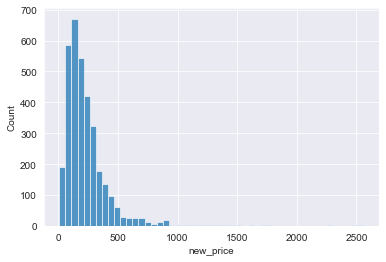

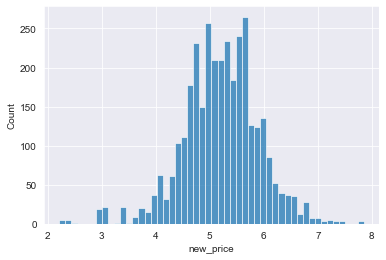

In [49]:
sns.histplot(data=data['new_price'],bins=50)
plt.show()

sns.histplot(data=np.log(data['new_price']),bins=50)
plt.show()

In [50]:
cols_to_log = ['new_price','used_price']
for col in cols_to_log:
    data[col + '_log'] = np.log(data[col])
data.drop(cols_to_log, axis=1, inplace=True)

In [51]:
data.sample(10)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3174     Others  Android        13.49  yes  no            13.0   
2414     Others   Others         5.72   no  no             0.3   
2151      Nokia  Android        19.21   no  no             8.0   
2959       Vivo  Android        13.49  yes  no            13.0   
3189        ZTE  Android        13.02  yes  no            13.0   
471        Acer  Android        17.78   no  no             0.3   
853        Asus  Android        12.70  yes  no            13.0   
66         Lava  Android        12.70   no  no             5.0   
2340     Others  Android        10.16   no  no             5.0   
1069     Others  Android        10.95   no  no             5.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
3174               5.0        16.0  4.00   2500.0   155.0          2015   
2414               2.0        32.0  0.25   2100.0   150.0          2014   
2151               5.0        32.0  4.00   5300.0   318.0          2014   
2959               5.0        16.0  4.00   3000.0   157.0          2017   
3189               8.0        64.0  4.00   3200.0   155.0          2017   
471                2.0        16.0  4.00   2955.0   323.0          2014   
853                2.0        32.0  4.00   2400.0   141.0          2013   
66                 0.3         8.0  0.50   3000.0   147.6          2016   
2340               2.0        16.0  4.00   1400.0   125.0          2014   
1069               0.3        16.0  4.00   2000.0   147.7          2013   

      days_used  new_price_log  used_price_log  
3174        777       4.866611        3.949126  
2414        789       2.901422        2.000128  
2151        893       5.771161        4.565909  
2959        799       5.133207        4.218331  
3189        889       5.290537        4.086312  
471        1082       4.863835        3.659451  
853         614       6.908245        5.992214  
66          819       4.113003        2.915064  
2340        844       4.868995        3.662279  
1069        619       4.997280        4.079569

#### Binning

In [52]:
min_value = data['ram'].min()
max_value = data['ram'].max()
bins = [min_value, 3.9, 5.9, max_value]
labels = ['small', 'medium', 'large']

data['ram_bins'] = pd.cut(data['ram'], bins=bins, labels=labels, include_lowest=True)
data.drop(['ram'], axis=1, inplace=True)
data['ram_bins'].value_counts()

medium    2881
small      297
large      213
Name: ram_bins, dtype: int64

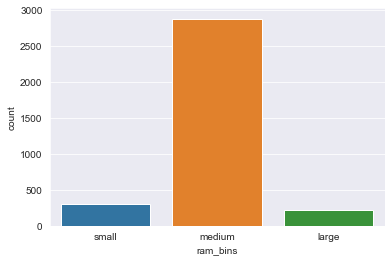

In [53]:
sns.countplot(data=data, x='ram_bins')
plt.show()

#### Standardizing

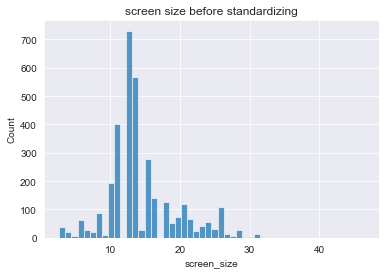

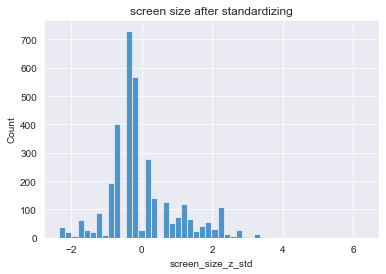

In [54]:
# Let's standardize the fields with units
# 1. Screen Size
sns.histplot(data=data['screen_size'],bins=50)
plt.title('screen size before standardizing')
plt.show()

std_scaler = StandardScaler()

data['screen_size_z_std'] = std_scaler.fit_transform(data[['screen_size']])

sns.histplot(data=data['screen_size_z_std'],bins=50)
plt.title('screen size after standardizing')
plt.show()

data.drop(['screen_size'], axis=1, inplace=True)

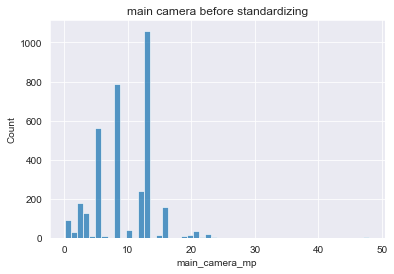

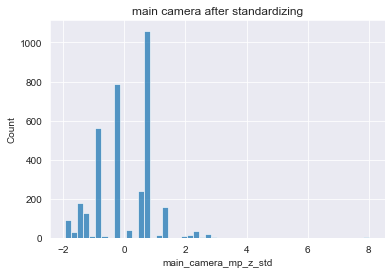

In [55]:
# 2. Main camera MP
sns.histplot(data=data['main_camera_mp'],bins=50)
plt.title('main camera before standardizing')
plt.show()

data['main_camera_mp_z_std'] = std_scaler.fit_transform(data[['main_camera_mp']])

sns.histplot(data=data['main_camera_mp_z_std'],bins=50)
plt.title('main camera after standardizing')
plt.show()

data.drop(['main_camera_mp'], axis=1, inplace=True)

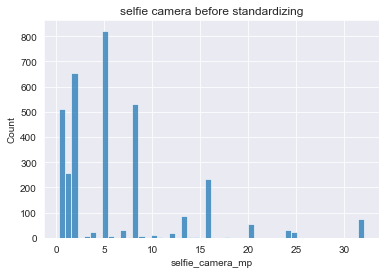

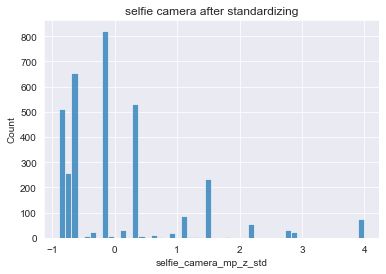

In [56]:
# 3. Selfie camera
sns.histplot(data=data['selfie_camera_mp'],bins=50)
plt.title('selfie camera before standardizing')
plt.show()

data['selfie_camera_mp_z_std'] = std_scaler.fit_transform(data[['selfie_camera_mp']])

sns.histplot(data=data['selfie_camera_mp_z_std'],bins=50)
plt.title('selfie camera after standardizing')
plt.show()

data.drop(['selfie_camera_mp'], axis=1, inplace=True)

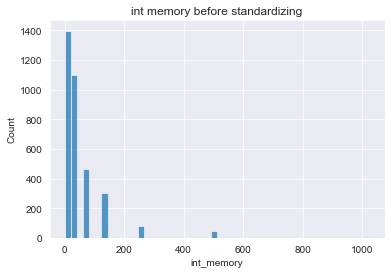

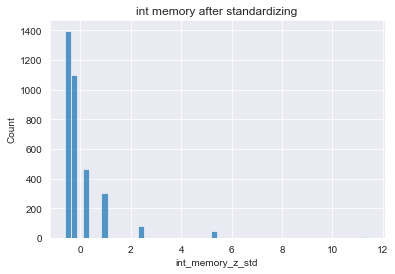

In [57]:
# 4. Int Memory
sns.histplot(data=data['int_memory'],bins=50)
plt.title('int memory before standardizing')
plt.show()

data['int_memory_z_std'] = std_scaler.fit_transform(data[['int_memory']])

sns.histplot(data=data['int_memory_z_std'],bins=50)
plt.title('int memory after standardizing')
plt.show()

data.drop(['int_memory'], axis=1, inplace=True)

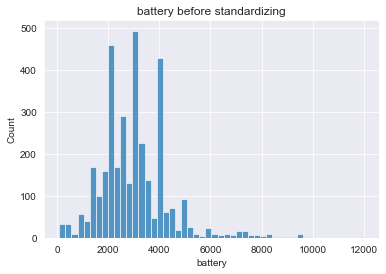

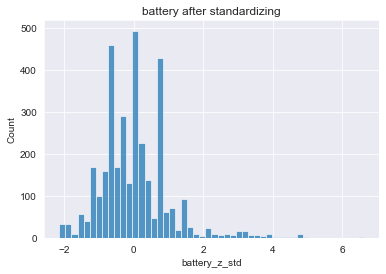

In [58]:
# 5. Battery
sns.histplot(data=data['battery'],bins=50)
plt.title('battery before standardizing')
plt.show()

data['battery_z_std'] = std_scaler.fit_transform(data[['battery']])

sns.histplot(data=data['battery_z_std'],bins=50)
plt.title('battery after standardizing')
plt.show()

data.drop(['battery'], axis=1, inplace=True)

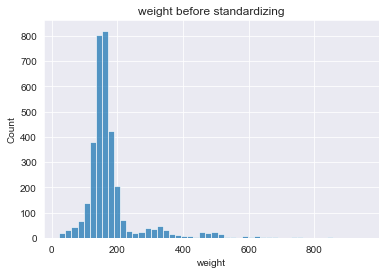

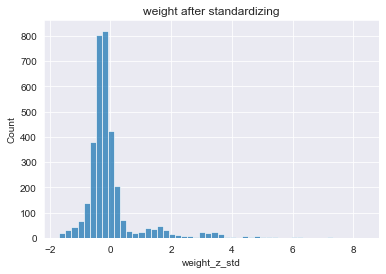

In [59]:
# 6. Weight
sns.histplot(data=data['weight'],bins=50)
plt.title('weight before standardizing')
plt.show()

data['weight_z_std'] = std_scaler.fit_transform(data[['weight']])

sns.histplot(data=data['weight_z_std'],bins=50)
plt.title('weight after standardizing')
plt.show()

data.drop(['weight'], axis=1, inplace=True)

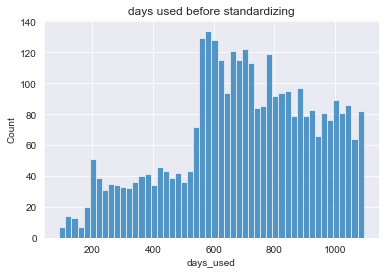

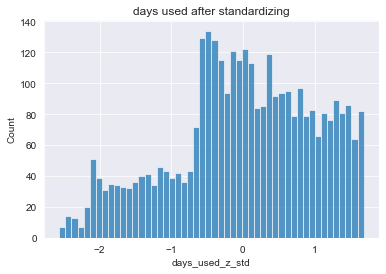

In [60]:
# 6. Days used
min_max = MinMaxScaler()
std_scaler = StandardScaler()

sns.histplot(data=data['days_used'],bins=50)
plt.title('days used before standardizing')
plt.show()

data['days_used_z_std'] = std_scaler.fit_transform(data[['days_used']])
# data['days_used_z_std'] = min_max.fit_transform(data[['days_used_z_std']])
#data['days_used_z_std'] = normalize(data[['days_used']])
# data['days_used_z_std'] = min_max.fit_transform(data[['days_used']])
#data['days_used_z_std'] = std_scaler.fit_transform(data[['days_used_z_std']])

sns.histplot(data=data['days_used_z_std'],bins=50)
plt.title('days used after standardizing')
plt.show()

data.drop(['days_used'], axis=1, inplace=True)

In [61]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping release year column as it is temporal variable

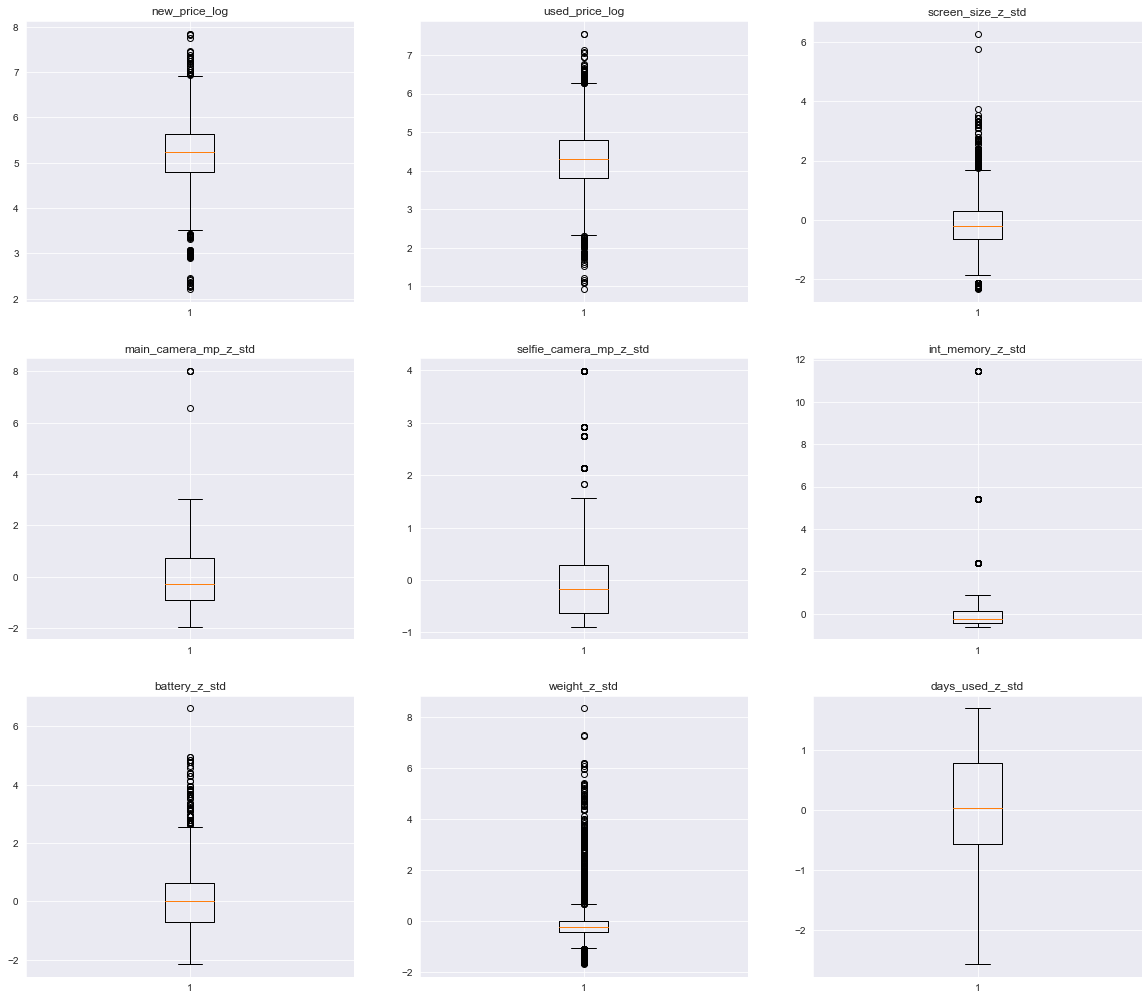

In [62]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.show()

In [63]:
# treat outliers using IQR 
# smaller values will be assigned lower whisker value and higher values will be assigned upper whisker value
def treat_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], LW, UW)

    return data

In [64]:
for c in numeric_columns:
    data = treat_outliers(data, c)

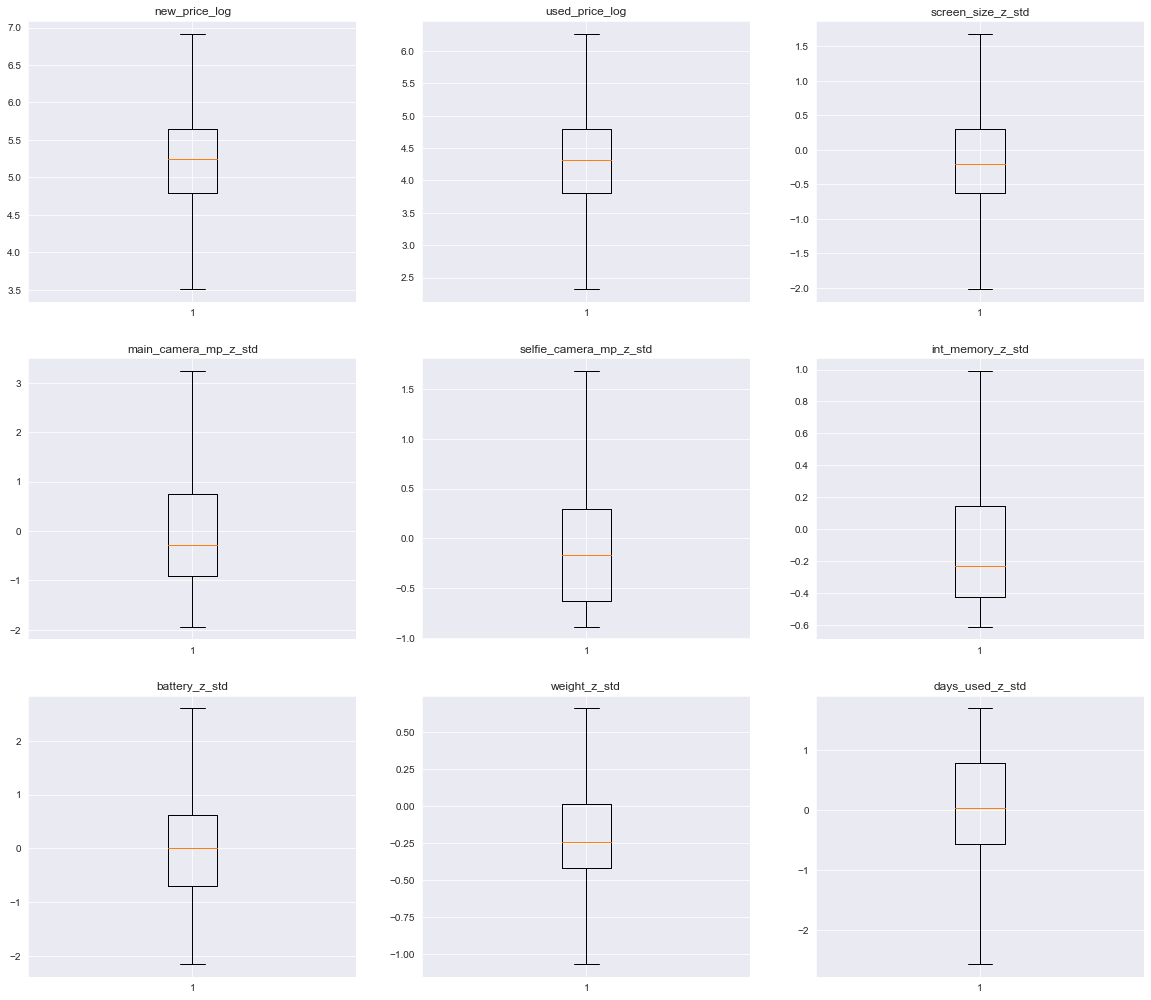

In [65]:
# let's check boxlots after outlier treatment
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.show()

#### EDA after data processing

In [66]:
data.columns

Index(['brand_name', 'os', '4g', '5g', 'release_year', 'new_price_log',
       'used_price_log', 'ram_bins', 'screen_size_z_std',
       'main_camera_mp_z_std', 'selfie_camera_mp_z_std', 'int_memory_z_std',
       'battery_z_std', 'weight_z_std', 'days_used_z_std'],
      dtype='object')

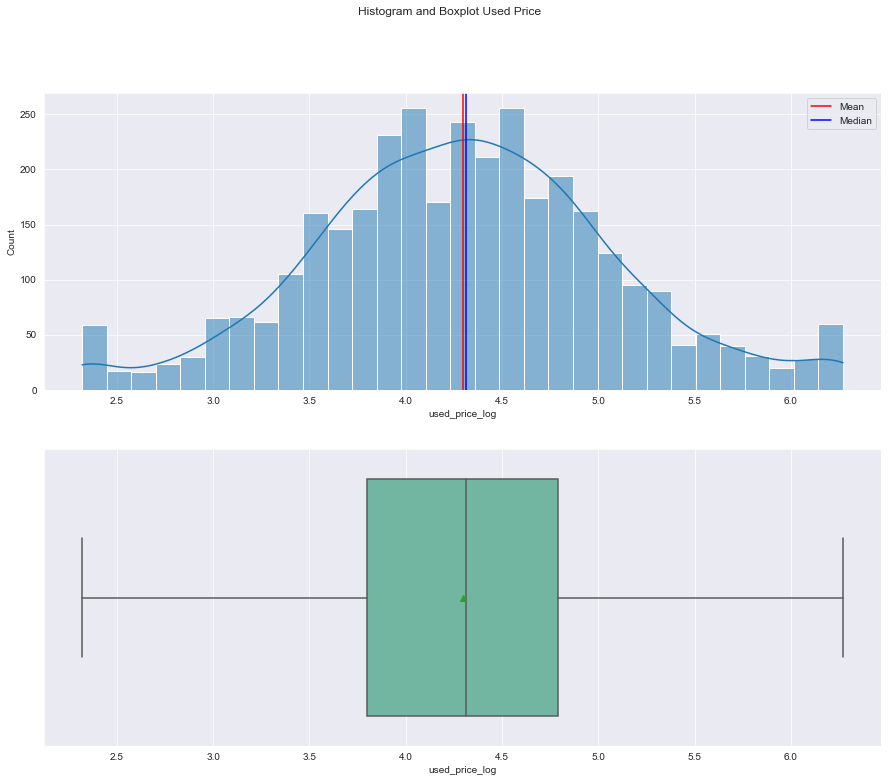

In [67]:
Hist_Bar_Plt(data['used_price_log'],'Used Price')

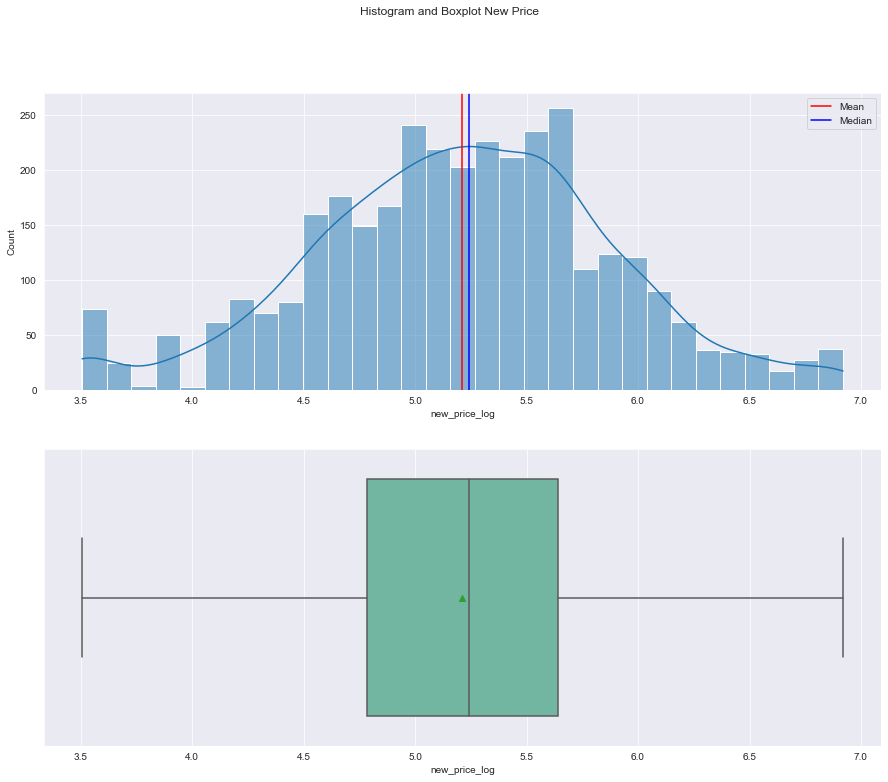

In [68]:
Hist_Bar_Plt(data['new_price_log'],'New Price')

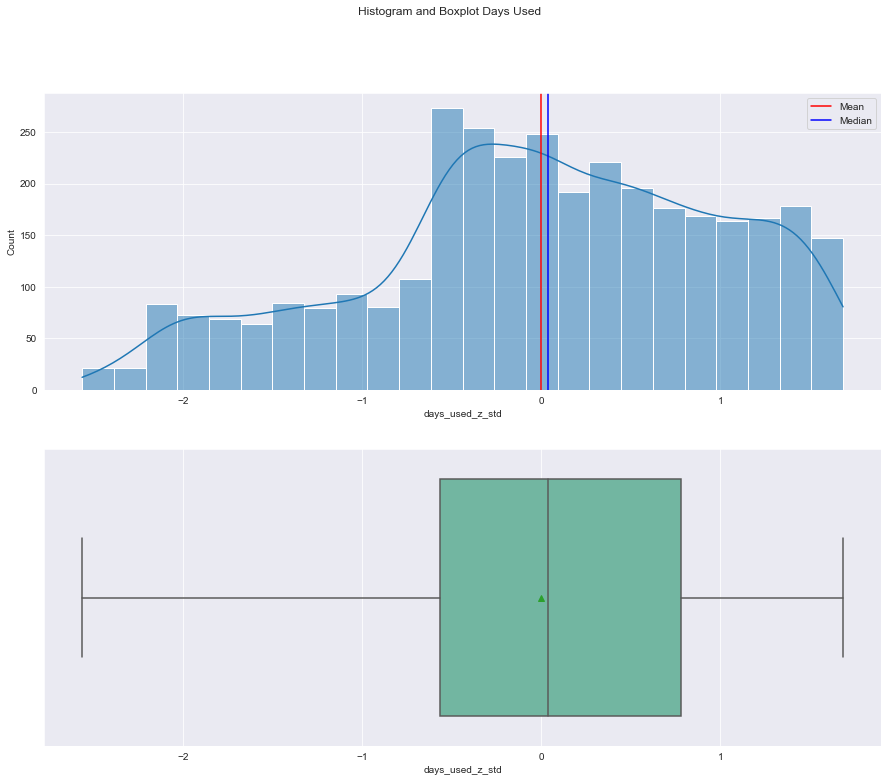

In [69]:
Hist_Bar_Plt(data['days_used_z_std'],'Days Used')

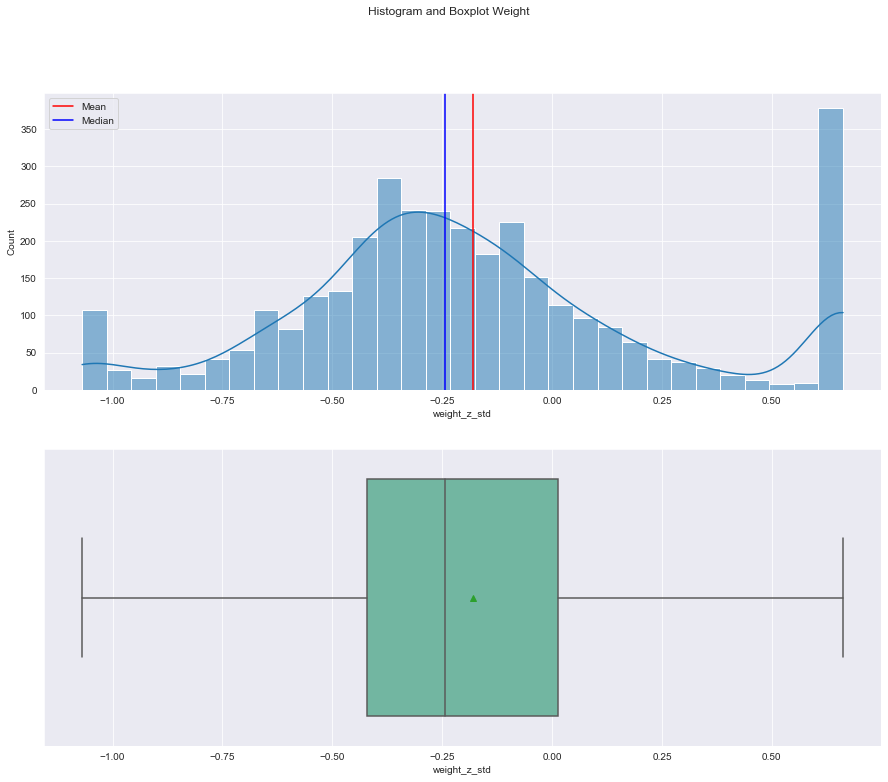

In [70]:
Hist_Bar_Plt(data['weight_z_std'],'Weight')

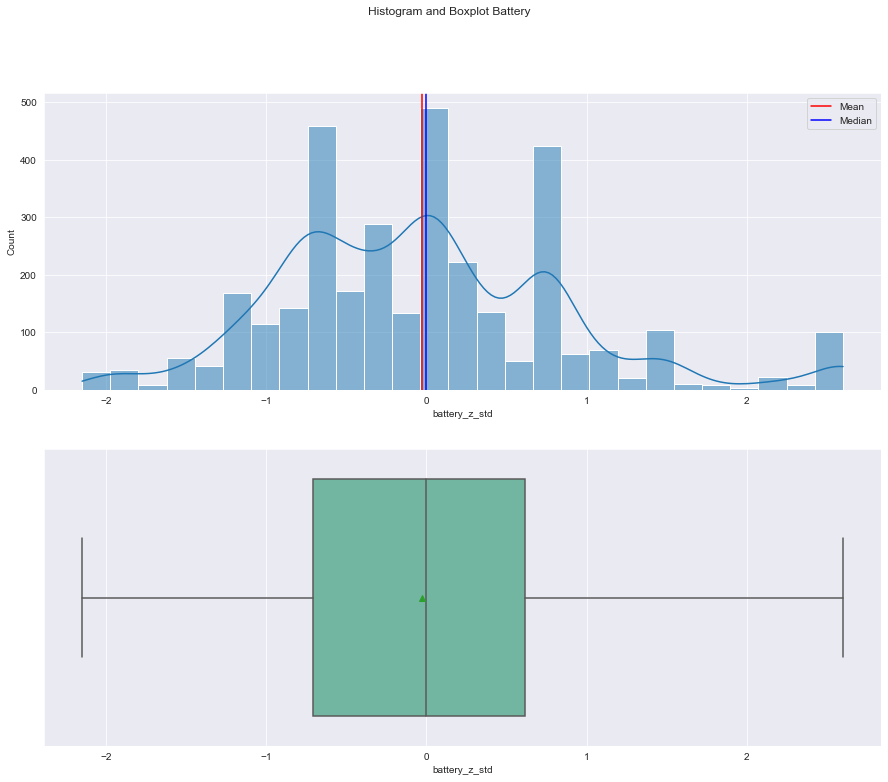

In [71]:
Hist_Bar_Plt(data['battery_z_std'],'Battery')

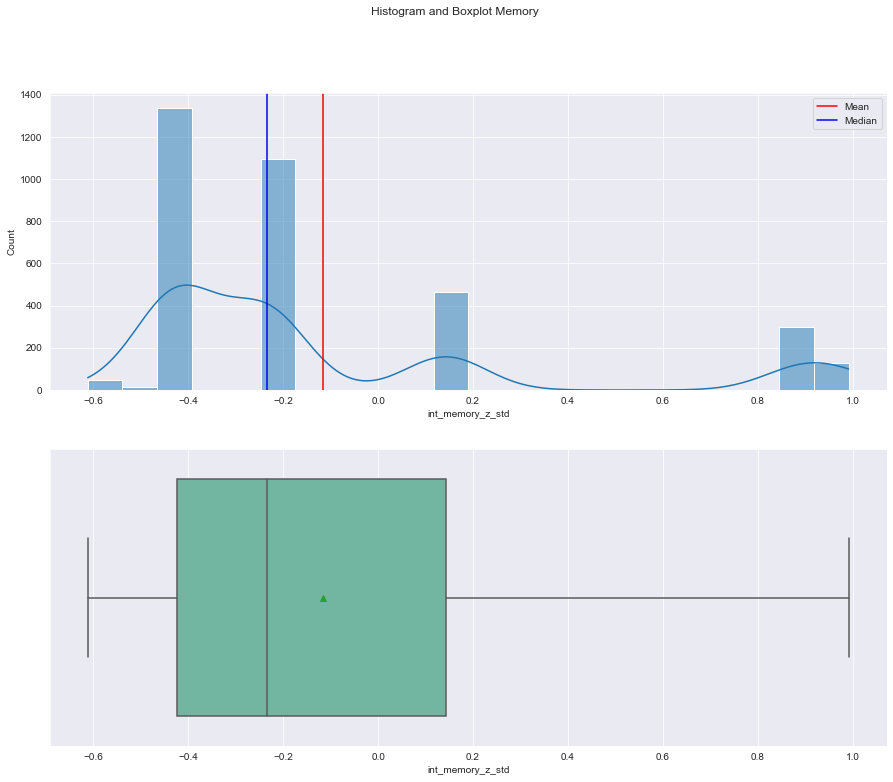

In [72]:
Hist_Bar_Plt(data['int_memory_z_std'],'Memory')

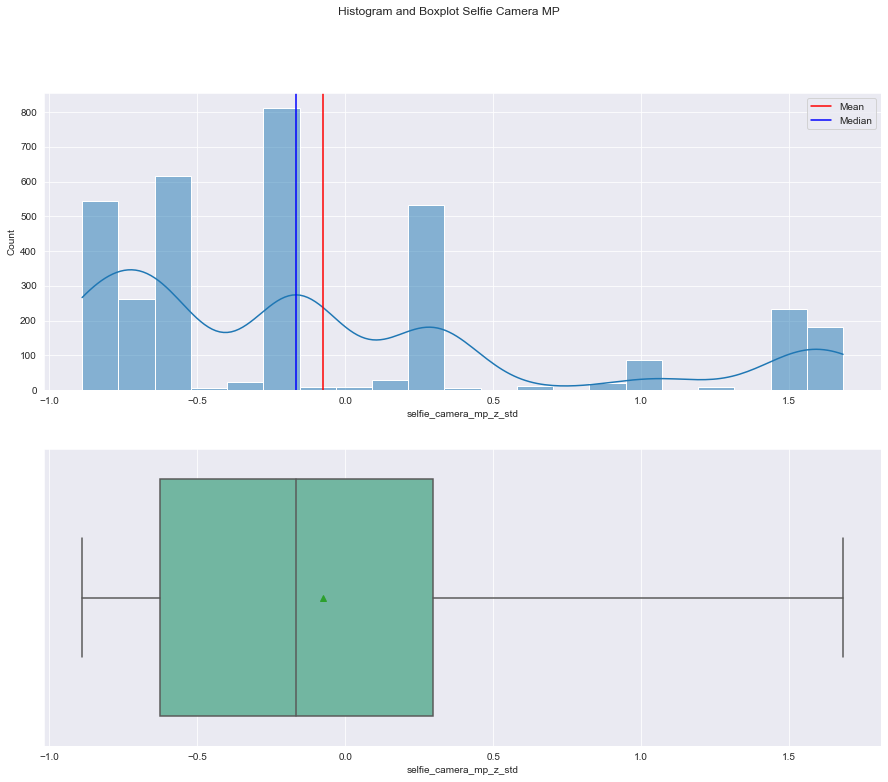

In [73]:
Hist_Bar_Plt(data['selfie_camera_mp_z_std'],'Selfie Camera MP')

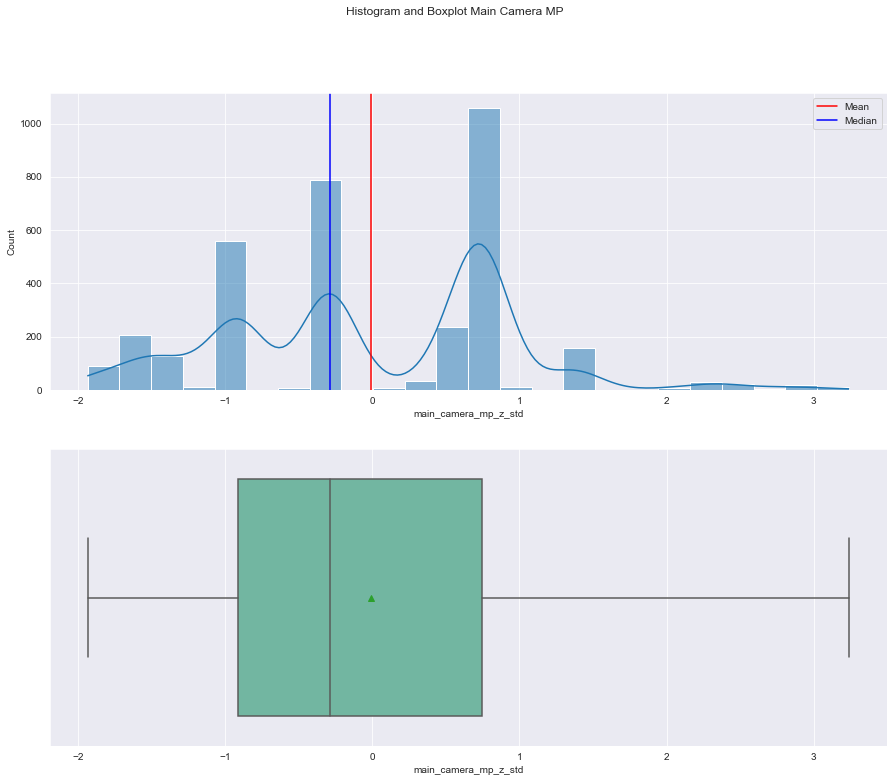

In [74]:
Hist_Bar_Plt(data['main_camera_mp_z_std'],'Main Camera MP')

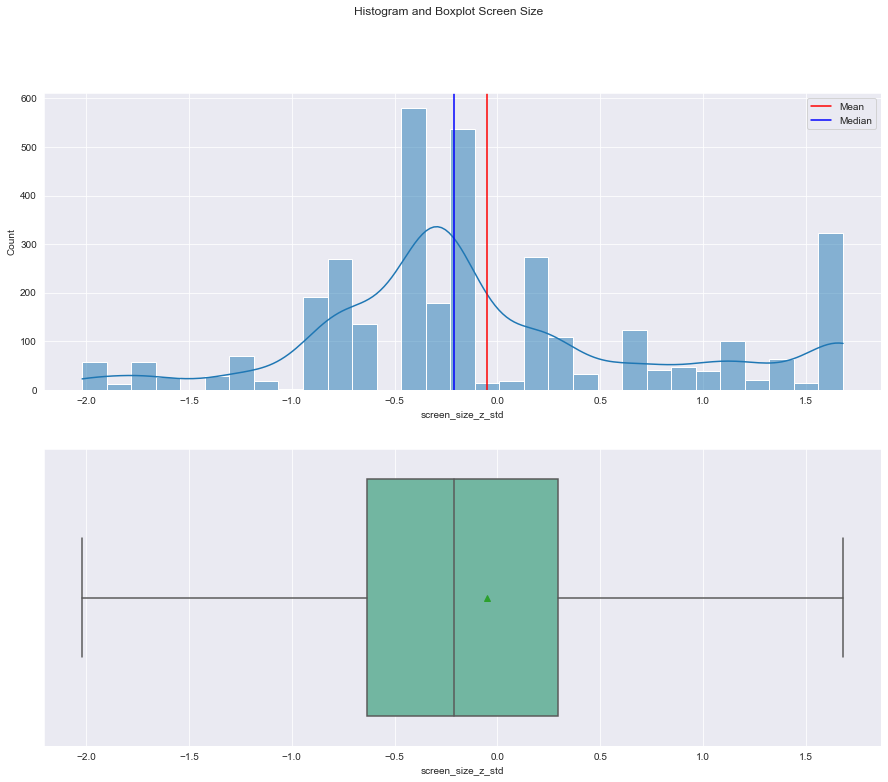

In [75]:
Hist_Bar_Plt(data['screen_size_z_std'],'Screen Size')

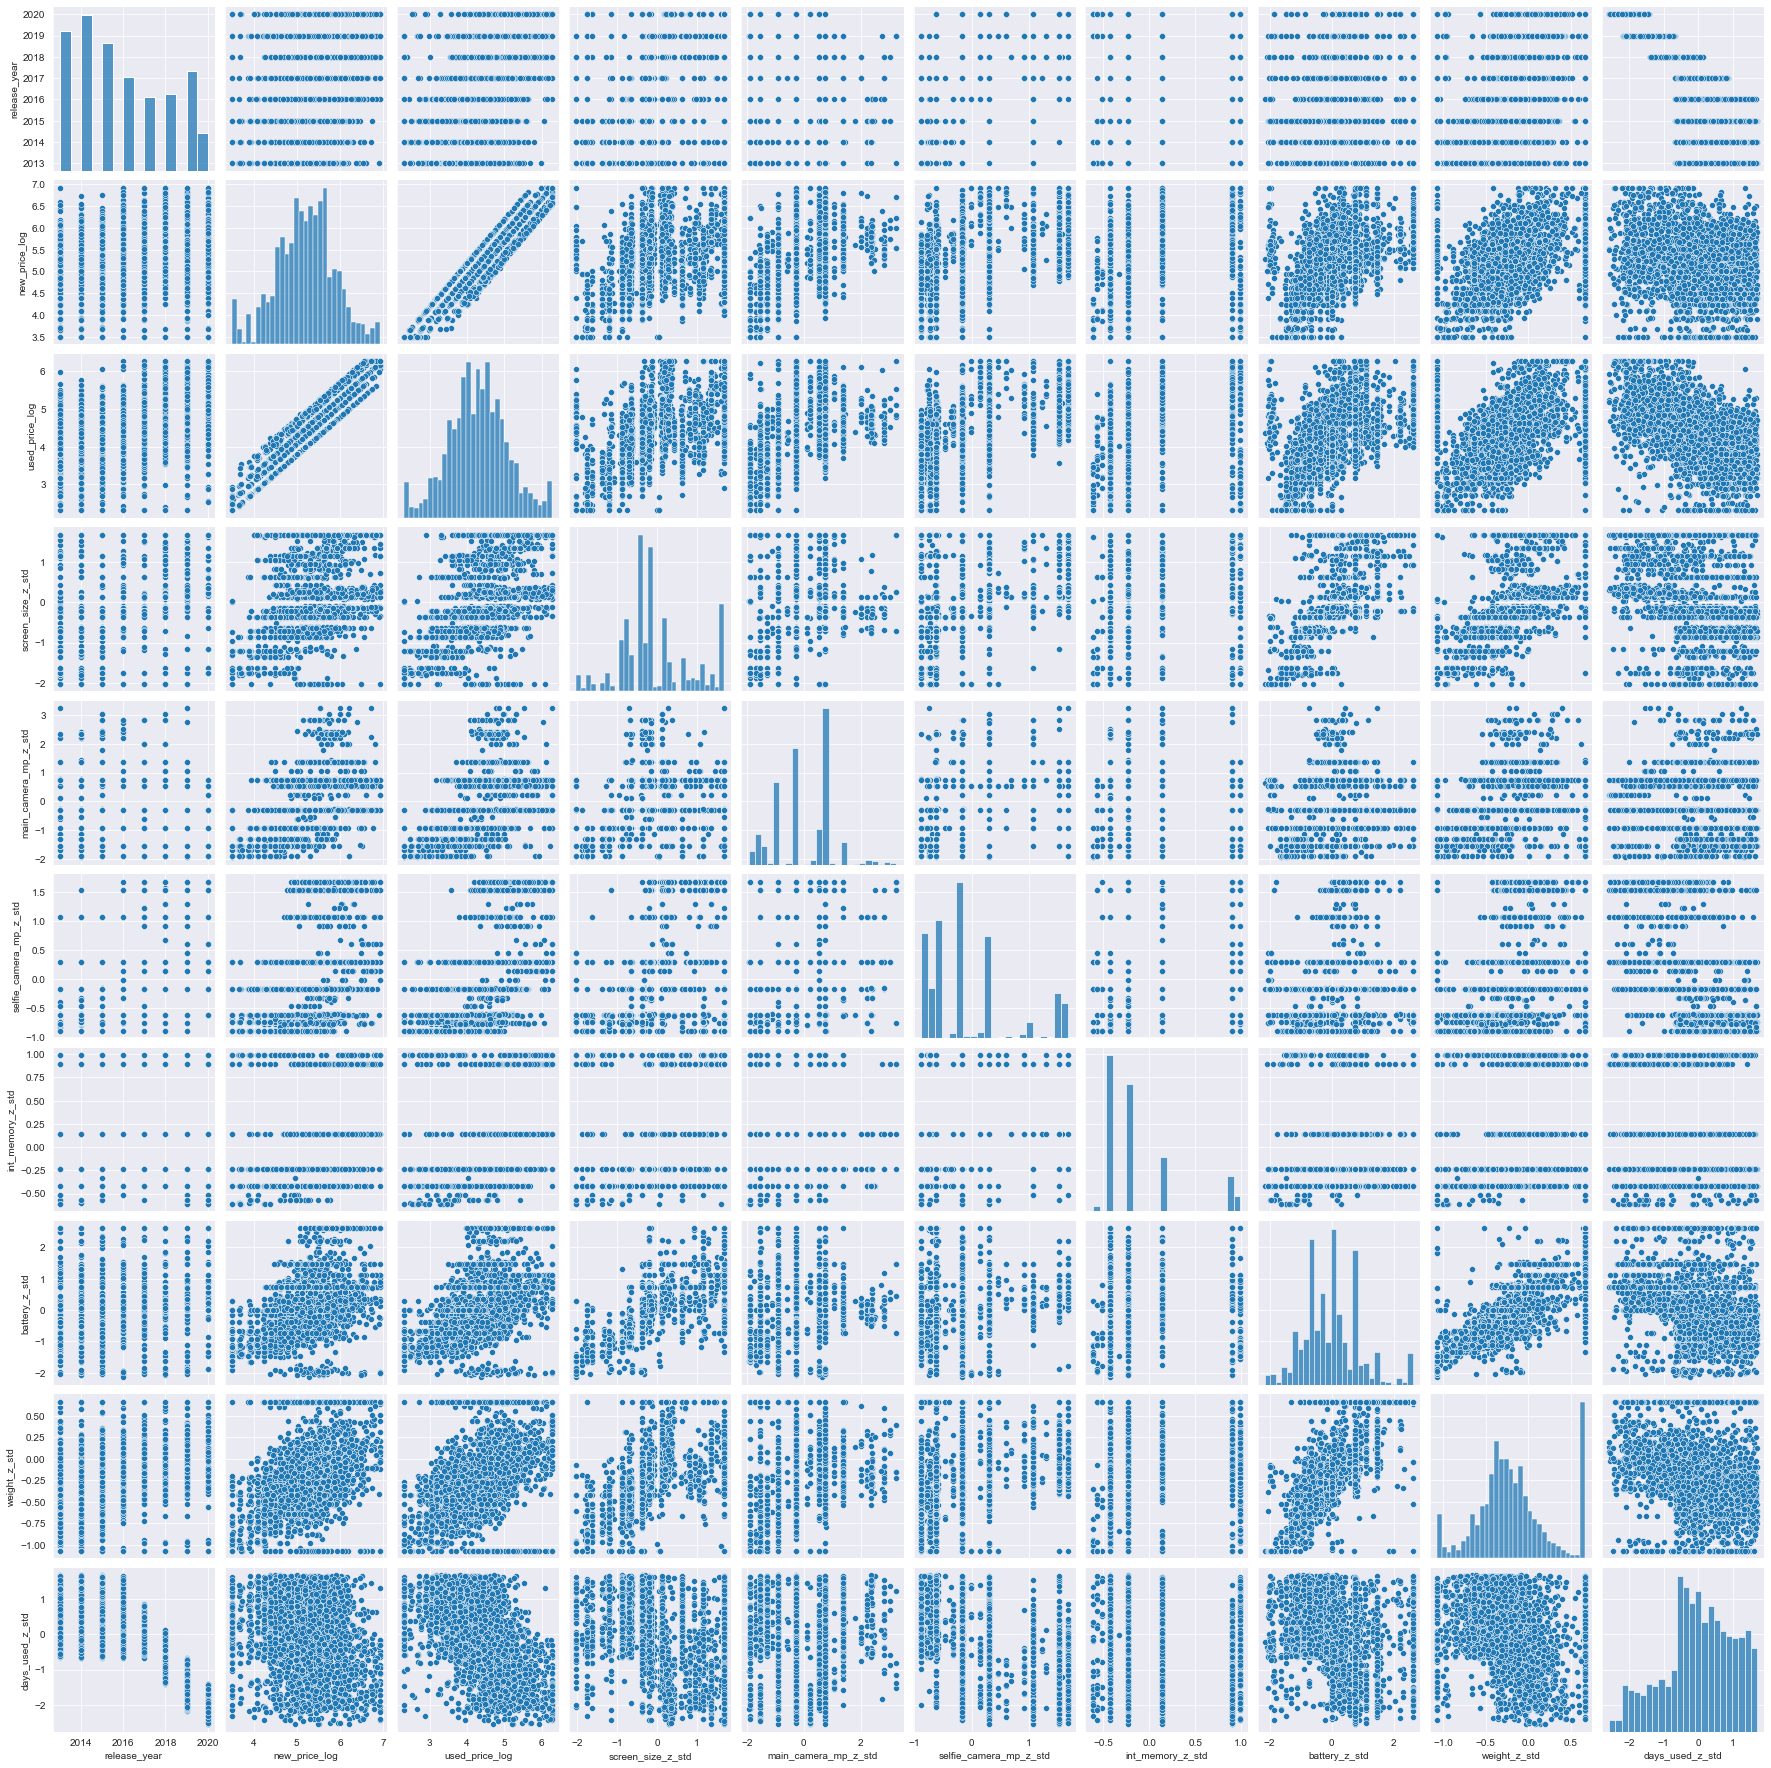

In [76]:
sns.pairplot(data=data)
plt.show()

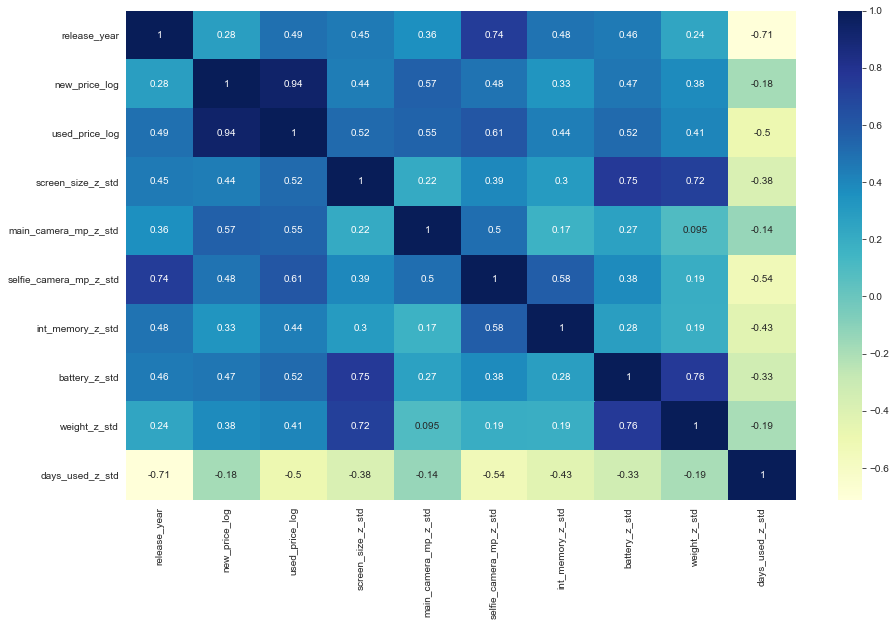

In [77]:
# Let's plot correlations heatmap
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Linear Regression Model

Target: Predict Used Price

In [78]:
# get the data ready for model
X = data.drop(["used_price_log"], axis=1)
y = data["used_price_log"]

In [79]:
X.head()

brand_name       os   4g   5g  release_year  new_price_log ram_bins  \
0      Honor  Android  yes   no          2020       4.715100    small   
1      Honor  Android  yes  yes          2020       5.519018    large   
2      Honor  Android  yes  yes          2020       5.884631    large   
3      Honor  Android  yes  yes          2020       5.630961    large   
4      Honor  Android  yes   no          2020       4.947837    small   

   screen_size_z_std  main_camera_mp_z_std  selfie_camera_mp_z_std  \
0           1.680832              0.747153               -0.165163   
1           1.680832              0.747153                1.527582   
2           1.680832              0.747153                0.296495   
3           1.680832              0.747153                0.296495   
4           0.231756              0.747153                0.296495   

   int_memory_z_std  battery_z_std  weight_z_std  days_used_z_std  
0          0.142452       0.012794     -0.355157        -2.410288  
1          0.896903       0.953680      0.369774        -1.571620  
2          0.896903       0.880174      0.369774        -2.262039  
3          0.142452       2.600231      0.661910        -1.486906  
4          0.142452       1.468228      0.066818        -1.707162

In [80]:
y.head()

0    4.465448
1    5.084443
2    5.593037
3    5.194234
4    4.642466
Name: used_price_log, dtype: float64

In [81]:
# encode categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
X.head()

release_year  new_price_log  screen_size_z_std  main_camera_mp_z_std  \
0          2020       4.715100           1.680832              0.747153   
1          2020       5.519018           1.680832              0.747153   
2          2020       5.884631           1.680832              0.747153   
3          2020       5.630961           1.680832              0.747153   
4          2020       4.947837           0.231756              0.747153   

   selfie_camera_mp_z_std  int_memory_z_std  battery_z_std  weight_z_std  \
0               -0.165163          0.142452       0.012794     -0.355157   
1                1.527582          0.896903       0.953680      0.369774   
2                0.296495          0.896903       0.880174      0.369774   
3                0.296495          0.142452       2.600231      0.661910   
4                0.296495          0.142452       1.468228      0.066818   

   days_used_z_std  brand_name_Alcatel  ...  brand_name_XOLO  \
0        -2.410288                   0  ...                0   
1        -1.571620                   0  ...                0   
2        -2.262039                   0  ...                0   
3        -1.486906                   0  ...                0   
4        -1.707162                   0  ...                0   

   brand_name_Xiaomi  brand_name_ZTE  os_Others  os_Windows  os_iOS  4g_yes  \
0                  0               0          0           0       0       1   
1                  0               0          0           0       0       1   
2                  0               0          0           0       0       1   
3                  0               0          0           0       0       1   
4                  0               0          0           0       0       1   

   5g_yes  ram_bins_medium  ram_bins_large  
0       0                0               0  
1       1                0               1  
2       1                0               1  
3       1                0               1  
4       0                0               0  

[5 rows x 48 columns]

In [82]:
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
x_train.shape

(2373, 48)

In [84]:
x_test.shape

(1018, 48)

In [85]:
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [86]:
coef = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), index=x_train.columns.tolist() + ["Intercept"],columns=["Coefficients"])
coef

Coefficients
release_year                0.001272
new_price_log               0.995324
screen_size_z_std           0.003215
main_camera_mp_z_std        0.002703
selfie_camera_mp_z_std      0.009091
int_memory_z_std            0.000263
battery_z_std               0.000255
weight_z_std                0.003725
days_used_z_std            -0.254089
brand_name_Alcatel         -0.006347
brand_name_Apple            0.100683
brand_name_Asus             0.003084
brand_name_BlackBerry       0.048513
brand_name_Celkon          -0.018727
brand_name_Coolpad         -0.016326
brand_name_Gionee          -0.035201
brand_name_Google          -0.007868
brand_name_HTC             -0.003296
brand_name_Honor            0.015460
brand_name_Huawei          -0.007527
brand_name_Karbonn         -0.020253
brand_name_LG               0.006628
brand_name_Lava            -0.010329
brand_name_Lenovo          -0.021628
brand_name_Meizu           -0.016537
brand_name_Micromax        -0.010342
brand_name_Microsoft       -0.027121
brand_name_Motorola        -0.019195
brand_name_Nokia           -0.022717
brand_name_OnePlus         -0.039571
brand_name_Oppo            -0.004710
brand_name_Others          -0.007337
brand_name_Panasonic       -0.020881
brand_name_Realme          -0.035876
brand_name_Samsung         -0.000048
brand_name_Sony            -0.021740
brand_name_Spice           -0.002620
brand_name_Vivo            -0.018597
brand_name_XOLO            -0.005672
brand_name_Xiaomi          -0.005662
brand_name_ZTE             -0.009836
os_Others                  -0.073180
os_Windows                  0.019222
os_iOS                     -0.089717
4g_yes                     -0.001335
5g_yes                     -0.036038
ram_bins_medium            -0.031064
ram_bins_large             -0.005526
Intercept                  -3.404619

- All the phone features have positive co-efficients. 
Screen size, Main camera, Selfie camera, Int memory, battery and weight
- Days used has impact i.e as number of usage days increase used price drops
- Medium and large RAMs negatively affect the price

### Model Evaluation

In [87]:
# def adj_r2_score(predictors, targets, predictions):
#     r2 = r2_score(targets, predictions)
#     n = predictors.shape[0]
#     k = predictors.shape[1]
#     return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# # function to compute MAPE
# def mape_score(targets, predictions):
#     return np.mean(np.abs(targets - predictions) / targets) * 100

def model_eval(model,variables,target):
    pred = model.predict(variables)

    # Mean Absolute Error
    mae = mean_absolute_error(target, pred)
    print(f'MAE:{mae}')

    # Mean Squared Error
    mse = mean_squared_error(target, pred)
    print(f'MSE:{mse}')

    # Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(target, pred))
    print(f'RMSE:{rmse}')

    # Mean Absolute Percentage Error
    mape = np.mean(np.abs(target - pred) / target) * 100
    print(f'MAPE:{mape}')
    
    # R2 Score
    r2 = r2_score(target, pred)
    print(f'R2:{r2}')
    
    # Adjuste R2 Score
    n = variables.shape[0]
    k = variables.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    print(f'Adj R2:{adj_r2}')

In [88]:
print('----- Training Model Performance -------')
model_eval(linearregression,x_train,y_train)
print('\n----- Testing Model Performance -------')
model_eval(linearregression,x_test,y_test)

----- Training Model Performance -------
MAE:0.07355300409144101
MSE:0.0083241411019903
RMSE:0.09123673110096778
MAPE:1.827625688701666
R2:0.9864234559651162
Adj R2:0.9861430454170634

----- Testing Model Performance -------
MAE:0.07540662837943761
MSE:0.008640125503701713
RMSE:0.09295227540895226
MAPE:1.8629707476930455
R2:0.9858549838591554
Adj R2:0.9851543019450578


#### Results

- The training R2 score is 98.64% showing the model explains 98% of the variation. The model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict life expectancy within a mean error of 2.7 years on the test data.

- MAPE on the test set suggests we can predict within 1.86% of used price.

#### Linear Regression using Stats Model

In [89]:
x_train1 = stat_model.add_constant(x_train)
x_test1 = stat_model.add_constant(x_test)

olsmod0 = stat_model.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3518.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:28:06   Log-Likelihood:                 2314.5
No. Observations:                2373   AIC:                            -4531.
Df Residuals:                    2324   BIC:                            -4248.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

#### Checking Linear Regression Assumptions

##### 1. Test for Multicollinearity

In [90]:
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [91]:
check_vif(x_train1) #0,11,20,32,35,44

feature           VIF
0                    const  4.187242e+06
1             release_year  4.782639e+00
2            new_price_log  3.194138e+00
3        screen_size_z_std  3.431509e+00
4     main_camera_mp_z_std  2.588933e+00
5   selfie_camera_mp_z_std  3.814484e+00
6         int_memory_z_std  2.061757e+00
7            battery_z_std  3.547787e+00
8             weight_z_std  2.996870e+00
9          days_used_z_std  2.293619e+00
10      brand_name_Alcatel  2.964895e+00
11        brand_name_Apple  4.256822e+01
12         brand_name_Asus  3.230419e+00
13   brand_name_BlackBerry  1.391249e+00
14       brand_name_Celkon  1.941767e+00
15      brand_name_Coolpad  1.328871e+00
16       brand_name_Gionee  1.892006e+00
17       brand_name_Google  1.419611e+00
18          brand_name_HTC  3.049687e+00
19        brand_name_Honor  3.047732e+00
20       brand_name_Huawei  5.485749e+00
21      brand_name_Karbonn  1.555114e+00
22           brand_name_LG  4.849623e+00
23         brand_name_Lava  1.629952e+00
24       brand_name_Lenovo  3.861525e+00
25        brand_name_Meizu  1.843025e+00
26     brand_name_Micromax  3.253638e+00
27    brand_name_Microsoft  2.146483e+00
28     brand_name_Motorola  2.643237e+00
29        brand_name_Nokia  3.509148e+00
30      brand_name_OnePlus  1.113149e+00
31         brand_name_Oppo  3.098686e+00
32       brand_name_Others  8.529678e+00
33    brand_name_Panasonic  1.963709e+00
34       brand_name_Realme  1.092418e+00
35      brand_name_Samsung  7.037447e+00
36         brand_name_Sony  2.530032e+00
37        brand_name_Spice  1.523529e+00
38         brand_name_Vivo  3.089517e+00
39         brand_name_XOLO  1.864720e+00
40       brand_name_Xiaomi  2.970077e+00
41          brand_name_ZTE  3.382215e+00
42               os_Others  1.712115e+00
43              os_Windows  1.841266e+00
44                  os_iOS  4.128753e+01
45                  4g_yes  2.428885e+00
46                  5g_yes  1.758130e+00
47         ram_bins_medium  2.214546e+00
48          ram_bins_large  2.901670e+00

- *brand_name_Apple* and *os_iOS* have high multicollinearity. That's justifiable, Apple brand only provides iOS OS
- *brand_name_Huawei, brand_name_Others, brand_name_Samsung* have collinearity more than 5

In [92]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = stat_model.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [93]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung"
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0  brand_name_Samsung                           0.986149   
1   brand_name_Huawei                           0.986148   
2   brand_name_Others                           0.986148   
3              os_iOS                           0.986144   
4    brand_name_Apple                           0.986142   

   RMSE after dropping col  
0                 0.092174  
1                 0.092178  
2                 0.092178  
3                 0.092192  
4                 0.092196

In [94]:
x_train2 = x_train1
x_test2 = x_test1

In [95]:
x_train2.drop(['brand_name_Samsung','brand_name_Apple'],axis = 1,inplace=True)
x_test2.drop(['brand_name_Samsung','brand_name_Apple'],axis = 1,inplace=True)

In [96]:
vif = check_vif(x_train2)
vif

feature           VIF
0                    const  4.174092e+06
1             release_year  4.766347e+00
2            new_price_log  3.162129e+00
3        screen_size_z_std  3.425680e+00
4     main_camera_mp_z_std  2.585227e+00
5   selfie_camera_mp_z_std  3.801049e+00
6         int_memory_z_std  2.060446e+00
7            battery_z_std  3.544879e+00
8             weight_z_std  2.994726e+00
9          days_used_z_std  2.293242e+00
10      brand_name_Alcatel  1.270021e+00
11         brand_name_Asus  1.286702e+00
12   brand_name_BlackBerry  1.096444e+00
13       brand_name_Celkon  1.349179e+00
14      brand_name_Coolpad  1.049319e+00
15       brand_name_Gionee  1.115023e+00
16       brand_name_Google  1.076256e+00
17          brand_name_HTC  1.266915e+00
18        brand_name_Honor  1.369572e+00
19       brand_name_Huawei  1.592817e+00
20      brand_name_Karbonn  1.120935e+00
21           brand_name_LG  1.457840e+00
22         brand_name_Lava  1.127077e+00
23       brand_name_Lenovo  1.378342e+00
24        brand_name_Meizu  1.131173e+00
25     brand_name_Micromax  1.398382e+00
26    brand_name_Microsoft  1.780575e+00
27     brand_name_Motorola  1.251812e+00
28        brand_name_Nokia  1.535566e+00
29      brand_name_OnePlus  1.018920e+00
30         brand_name_Oppo  1.317838e+00
31       brand_name_Others  1.971406e+00
32    brand_name_Panasonic  1.141248e+00
33       brand_name_Realme  1.024253e+00
34         brand_name_Sony  1.265101e+00
35        brand_name_Spice  1.115433e+00
36         brand_name_Vivo  1.353142e+00
37         brand_name_XOLO  1.161389e+00
38       brand_name_Xiaomi  1.321445e+00
39          brand_name_ZTE  1.330888e+00
40               os_Others  1.682367e+00
41              os_Windows  1.840583e+00
42                  os_iOS  1.210882e+00
43                  4g_yes  2.411125e+00
44                  5g_yes  1.757617e+00
45         ram_bins_medium  2.209816e+00
46          ram_bins_large  2.899245e+00

- dropping brand_name_Samsung and brand_name_Apple have reduced multicollinearity less than 5

In [97]:
olsmod1 = stat_model.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3672.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:28:06   Log-Likelihood:                 2313.9
No. Observations:                2373   AIC:                            -4534.
Df Residuals:                    2326   BIC:                            -4263.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

- dropping multicollinear columns have no effect on adjusted R score
- treating p-values to improve score

In [98]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = stat_model.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'new_price_log', 'selfie_camera_mp_z_std', 'days_used_z_std', 'brand_name_BlackBerry', 'brand_name_Honor', 'os_Others', '5g_yes', 'ram_bins_medium']


In [99]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [100]:
olsmod2 = stat_model.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:28:06   Log-Likelihood:                 2301.2
No. Observations:                2373   AIC:                            -4584.
Df Residuals:                    2364   BIC:                            -4532.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

- All the features with no significance are droppped
- There is no change R score
- The model can explain 98.6% of data which is really high

##### 2. Test for Linearity and Independence

In [101]:
# create dataframe for actual, fitted and residuals
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod2.fittedvalues
df_pred["Residuals"] = olsmod2.resid
df_pred.head()

Actual Values  Fitted Values  Residuals
2830       5.024801       5.116484  -0.091683
2992       4.000400       4.023648  -0.023248
1741       4.271095       4.265995   0.005100
1505       4.501142       4.379442   0.121701
1111       3.907211       3.846551   0.060661

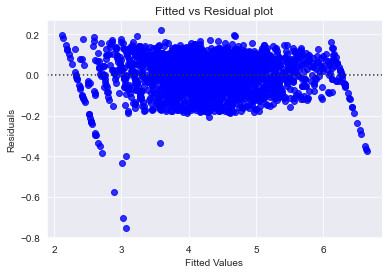

In [102]:
# let's plot the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=False)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

We see pattern here, indicating there is linearity and are not independent.
*Next Step:* Transform the features

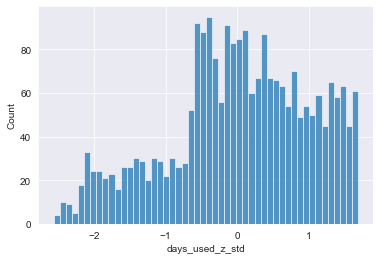

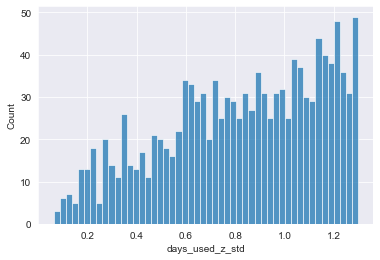

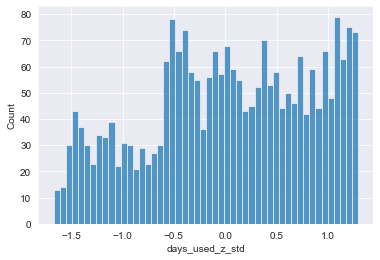

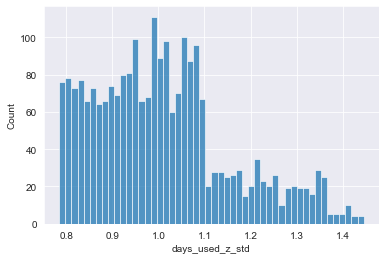

In [103]:
sns.histplot(data=x_train3['days_used_z_std'],bins=50)
plt.show()
sns.histplot(data=np.sqrt(x_train3['days_used_z_std']),bins=50)
plt.show()
sns.histplot(data=np.arcsinh(x_train3['days_used_z_std']),bins=50)
plt.show()
sns.histplot(data=np.sqrt(0.75 ** x_train3['days_used_z_std']),bins=50)
plt.show()

In [104]:
x_train4 = x_train3
x_test4 = x_test3

In [105]:
x_train4['new_price_log'] = std_scaler.fit_transform(x_train4[['new_price_log']])
x_train4['days_used_z_std'] = np.sqrt(0.75 ** x_train4['days_used_z_std'])

x_test4['new_price_log'] = std_scaler.fit_transform(x_test4[['new_price_log']])
x_test4['days_used_z_std'] = np.sqrt(0.75 ** x_test4['days_used_z_std'])

x_train4.drop(['selfie_camera_mp_z_std','brand_name_Honor'],axis=1, inplace=True)
x_test4.drop(['selfie_camera_mp_z_std','brand_name_Honor'],axis=1, inplace=True)

In [106]:
olsmod3 = stat_model.OLS(y_train, x_train4).fit()
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.032e+04
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:28:08   Log-Likelihood:                 2380.9
No. Observations:                2373   AIC:                            -4748.
Df Residuals:                    2366   BIC:                            -4707.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.51

In [107]:
# create dataframe for actual, fitted and residuals
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod3.fittedvalues
df_pred["Residuals"] = olsmod3.resid
df_pred.head()

Actual Values  Fitted Values  Residuals
2830       5.024801       5.110490  -0.085689
2992       4.000400       4.020532  -0.020132
1741       4.271095       4.252171   0.018924
1505       4.501142       4.415786   0.085356
1111       3.907211       3.842600   0.064612

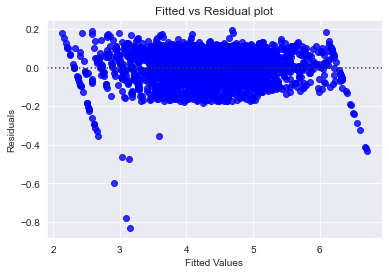

In [108]:
# let's plot the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=False)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Although there is little linearity visibile we'll proceed with the further tests. Transforming has not helped remove linearity

##### 3. Test for Normality

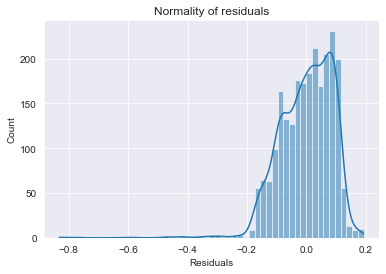

In [109]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

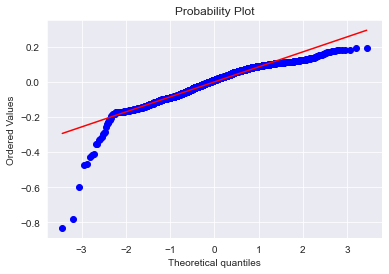

In [110]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals are in line except the test
- Let's perform Shapiro-Wilk test

In [111]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9268954396247864, pvalue=1.5487840429958254e-32)

p-value is <0.05, assumption is satisfied

##### 4. Test Heteroscedasticity

In [112]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9545592180950387), ('p-value', 0.7876733944450137)]

p-value > 0.05, the assumption is satisfied

#### Moving on to finalize model

In [113]:
# predictions on the test set
pred = olsmod3.predict(x_test4)

y_test2 = np.exp(y_test)
pred2 = np.exp(pred)

df_pred_test = pd.DataFrame({"Actual": y_test2, "Predicted": pred2})
df_pred_test.sample(10, random_state=1)

Actual   Predicted
738    59.73   55.060457
643    63.64   66.148647
1462   75.06   82.055970
240    66.27   67.913894
450    45.28   50.404224
69     60.64   67.915299
2034   27.60   27.076814
1183   30.06   34.214945
1189   42.14   38.553640
1873  111.25  119.281126

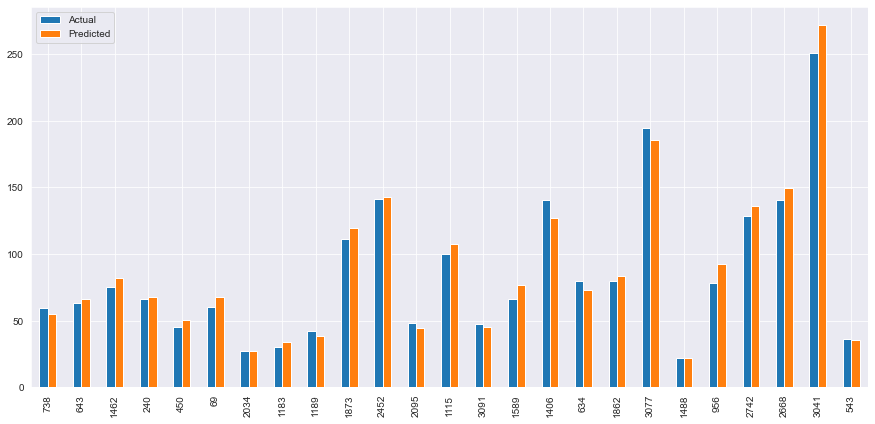

In [114]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

- The actual and predicted are comparable
- Both the values are close

In [115]:
print('----- Training Model Performance -------')
model_eval(olsmod3,x_train4,y_train)
print('\n----- Testing Model Performance -------')
model_eval(olsmod3,x_test4,y_test)

----- Training Model Performance -------
MAE:0.07012499868154412
MSE:0.007871303552155155
RMSE:0.08872036717775211
MAPE:1.7371881240449563
R2:0.9871620269312565
Adj R2:0.9871240287023004

----- Testing Model Performance -------
MAE:0.07094973911842188
MSE:0.007965846984989495
RMSE:0.08925159373921283
MAPE:1.7592033459529532
R2:0.986958866033844
Adj R2:0.9868684819370488


- The model explains 98% of data indicating a good model
- The Adj R2 score for training and testing are close indicating no over fitting or underfitting
- MAE, MSE and RMSE lower and comparable

#### Finalizing the model

In [116]:
olsmod_final = stat_model.OLS(y_train, x_train4).fit()
print(olsmod_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.032e+04
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:28:09   Log-Likelihood:                 2380.9
No. Observations:                2373   AIC:                            -4748.
Df Residuals:                    2366   BIC:                            -4707.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.51

### <span style="color:#008000"/>Conclusion

1. The features that have effect on the used price are the New price, Number of days used, whether phone is a BlackBerry, Other OS, 5g and Medium RAM

2. New price has positive effect, higher priced phone have higher used price

3. Brand OS other than iOS, Android and Windows have negative used price effect

4. Smaller the RAM reduces used price for the phone